In [62]:
import deepxde as dde
from deepxde.backend import pytorch
import torch
import matplotlib.pyplot as plt
import numpy as np

from SIRD_deepxde_DiseaseModel import SIRD_deepxde_net
from DiseaseModel import SIR,SIRD,SIRDIm, SIRIm, SIRImRel, SIRDImRel, SIRD2Var, SIRD2VarRelSimple, GeneralModelSolver
from Plot import Plot

# %matplotlib widget

seed = 2
np.random.seed(seed)
dde.config.set_random_seed(seed)

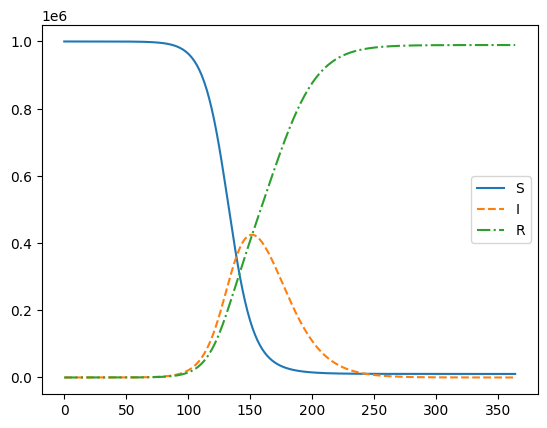

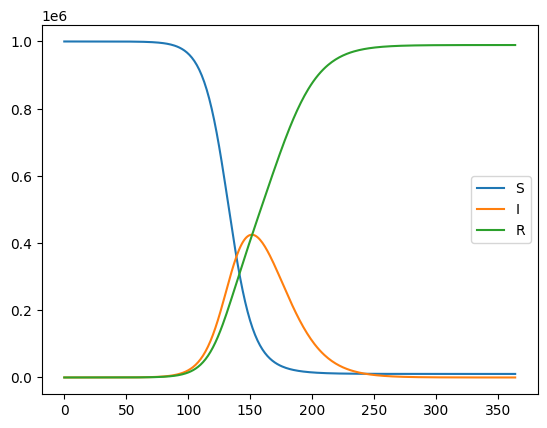

In [63]:
time_delta = [0,365] # use three values here for intro time of second variant

initial_conditions = {
    "S": 1000000,
    "I": 1,
    "R": 0,
    }
static_parameters = {
    "alpha": (0.22),
    "beta": (0.11),
    }
sird_model_PINN = SIR(initial_conditions, static_parameters, time_delta)

# initial_conditions = {
#     "S": 1000000,
#     "I": 1,
#     "R": 0,
#     "D": 0,
#     }
# static_parameters = {
#     "alpha": (0.15),
#     "beta": (0.07),
#     "gamma": (0.001),
#     }
# sird_model = SIRD(initial_conditions, static_parameters, time_delta)

# initial_conditions = {
#     "S": 1000000,
#     "I": 15,
#     "R": 0,
#     "D": 0,
#     "Im": 0, # should be between 0 and 1
#     }
# static_parameters = {
#     "alpha": 0.12,
#     "beta": 0.07,
#     "gamma": 0.02,
#     "kappa": 0.2,
#     }
# sird_model = SIRDIm(initial_conditions, static_parameters, time_delta)
# initial_conditions = {
#     "S": 1000000,
#     "I": 1,
#     "R": 0,
#     "D": 0,
#     "Im": 0, # should be between 0 and 1
#     }
# static_parameters = {
#     "lambda_": 1.5,
#     "gamma": 0.000,
#     "kappa": 0.2,
#     }
# sird_model = SIRImRelSimple(initial_conditions, static_parameters, time_delta)



initial_conditions = {
    "S": 1000000,
    "I": 1,
    "R": 0,
    "Im": 0, # should be between 0 and 1
    }
static_parameters = {
    "alpha": 0.17,
    "beta": 0.07,
    "kappa": 0.5,
    }
sird_model_synth = SIRIm(initial_conditions, static_parameters, time_delta)

# initial_conditions = {
#     "S": 1000000,
#     "I": 1000,
#     "R": 0,
#     "Im": 0, # should be between 0 and 1
#     }
# static_parameters = {
#     "lambda_": 1.8,
#     "kappa": 0.1,
#     }
# sird_model_PINN = SIRImRel(initial_conditions, static_parameters, time_delta)

# initial_conditions = {
#     "S": 1000000,
#     "Ia": 1,
#     "Ib": 0,
#     "Ra": 0,
#     "Rb": 0,
#     "D": 0,
#     "Im_a": 0, # should be between 0 and 1
#     "Im_b": 0, # should be between 0 and 1
#     }
# static_parameters = {
#     "alpha_a": 0.23  ,
#     "alpha_b": 0.18,
#     "beta_a": 0.1,
#     "beta_b": 0.08,
#     "gamma_a": 0.00,
#     "gamma_b": 0.00,
#     "kappa_a": 0.8,
#     "kappa_b": 0.5,
#     }
# static_parameters = {
#     "alpha_a": 0.11,
#     "alpha_b": 0.12,
#     "beta_a": 0.08,
#     "beta_b": 0.08,
#     "gamma_a": 0.00,
#     "gamma_b": 0.00,
#     "kappa_a": 0.1,
#     "kappa_b": 0.2,
#     }
# sird_model = SIRD2Var(initial_conditions, static_parameters, time_delta)

# initial_conditions = {
#     "S": 1000000,
#     "Ia": 1,
#     "Ib": 0,
#     "Ra": 0,
#     "Rb": 0,
#     "Im_a": 0, 
#     "Im_b": 0,
#     }
# static_parameters = {
#     "lambda_a": 2.2  ,
#     "lambda_b": 1.9,
#     "kappa_a": 0.8, # should be between 0 and 1
#     "kappa_b": 0.5,
#     }

# sird_model = SIRD2VarRelSimple(initial_conditions, static_parameters, time_delta)


t_synth, solution_synth_full = sird_model_synth.simulate()
t_synth, solution_synth = sird_model_synth.get_solution_as_sird()
sird_model_synth.plot_solution()
sird_model_synth.plot_sird()


In [64]:
print(sird_model_synth)



A Disease Model with description: 'A model that simulates continous reinfection and natural herd immunity as a factor of the amount of recovered':
Parameters:
	alpha = 0.17
	beta = 0.07
	kappa = 0.5

PDE groups and initial conditions:
	S = 1000000
	I = 1
	R = 0
	Im = 0

PDE equations:
 	dS/dt = -(alpha/N)*I*(S)
	dI/dt = (alpha/N)*(S)*I + (alpha/N)*(1 - Im)*(R)*I - beta*I
	dR/dt = beta*I - (alpha/N)*(1 - Im)*(R)*I 
	dIm/dt = kappa*beta*I/N
PINN PDE loss equations:
	dS_t - (-(alpha/N)*I*(S))
	dI_t - ((alpha/N)*(S)*I + (alpha/N)*(1 - Im)*(R)*I - beta*I)
	dR_t - (beta*I - (alpha/N)*(1 - Im)*(R)*I )
	dIm_t - (kappa*beta*I/N)


In [65]:
print(sird_model_PINN)


A Disease Model with description: 'The standard SIR model with Susceptible, Infection, and Removed, and alpha, beta as static parameters':
Parameters:
	alpha = 0.22
	beta = 0.11

PDE groups and initial conditions:
	S = 1000000
	I = 1
	R = 0

PDE equations:
 	dS/dt = -(alpha/N) * I*S
	dI/dt = (alpha/N)*S*I - beta*I
	dR/dt = beta*I 
PINN PDE loss equations:
	dS_t - (-(alpha/N) * I*S)
	dI_t - ((alpha/N)*S*I - beta*I)
	dR_t - (beta*I )


In [66]:
# keep this even if not subsetting
t = t_synth
wsol = solution_synth

solver = GeneralModelSolver(sird_model_PINN)
# subset
# max_timestep = 300
# t_bool = t_synth < max_timestep
# t = t_synth[t_bool]
# wsol = wsol_synth[t_bool]

In [67]:
model = SIRD_deepxde_net(t, wsol,disease_model=sird_model_PINN,  model_name="diseasemodel_cross", with_softadapt=False,
                        with_neumann=False, # important for peak prediction
                        use_ln_space=False,
                        use_ic_loss=True,
                        use_observe_loss=True,
                        use_observe_sum_loss=True,
                        use_sign_loss=True,
                        use_smooth_loss=False,
                        use_initL1_loss=False,
                        use_infectedL1_loss=False,)
print(model)
hyper_print_every = 2000
static_loss_weights = []
for key in (model.PDE_names + list(model.loss_points_dict.keys())):
    if "d" in key and "_t" in key:
        w = 10
    else:
        w = 0.1
    static_loss_weights.append(w)
model.init_model(lr=0.01, print_every=hyper_print_every, activation="tanh", loss="MSE", nn_layers=2, nn_layer_width=32, loss_weights=static_loss_weights)




PINN model:
Parameters: ['alpha', 'beta']
Loss measures: ['dS_t ', 'dI_t ', 'dR_t ', 'ic_I', 'ic_R', 'ic_S', 'observe_S', 'observe_I', 'observe_R', 'observe_SUM', 'sign_I', 'sign_R']
Compiling model...
'compile' took 0.000277 s



In [68]:
# prev_best_step = 0
# iters = 0


In [69]:
def intermediate_train(plot_every=hyper_print_every, reset=False):
    TOTAL_ITER = 100_000
    iters = 0
    if not hasattr(intermediate_train, "prev_best_step") or reset:
        setattr(intermediate_train, "prev_best_step", 0)
    try:
        while True:
            iters += plot_every
            # for n in range(TOTAL_ITER//plot_every):
            model.train_model(iterations=plot_every, print_every=hyper_print_every, use_LBFGSB=False)
            best_step = model.get_best_train_step() # TODO make a get_best_step function
            if best_step > intermediate_train.prev_best_step:
                setattr(intermediate_train, "prev_best_step", best_step)
                break
            elif iters >= TOTAL_ITER:
                break
    except KeyboardInterrupt:
        print("Training ended prematurely")

    params_nn = model.get_best_params() 
    print(static_parameters, sep="\n")
    t_nn_param, wsol_nn_param, wsol_sird_nn_param = solver(*params_nn)
    # params_nn= tuple(np.exp([*params_nn]))
    # print(*params_nn)
    model.set_synthetic_data(t_synth, solution_synth_full) 
    model.set_nn_synthetic_data(t_nn_param, wsol_nn_param, wsol_sird_nn_param)
    plot = Plot(model) # class that contains plotting functions
    plot.show_known_and_prediction()


# plot.plot_param_history()
# plot.plot_loss_history()


Training model...

0         [3.19e-02, 5.75e-03, 2.96e-03, 0.00e+00, 0.00e+00, 1.00e-01, 4.63e-02, 7.70e-03, 1.45e-02, 4.41e-02, 2.64e-03, 0.00e+00]                                  [3.19e-02, 5.75e-03, 2.96e-03, 0.00e+00, 0.00e+00, 1.00e-01, 4.63e-02, 7.70e-03, 1.45e-02, 4.41e-02, 2.64e-03, 0.00e+00]                                  []  
2000      [3.83e-06, 3.59e-06, 2.54e-06, 7.82e-10, 2.45e-10, 2.51e-10, 3.93e-06, 2.31e-05, 1.79e-05, 5.60e-07, 1.57e-06, 2.23e-08]                                  [3.83e-06, 3.59e-06, 2.54e-06, 7.82e-10, 2.45e-10, 2.51e-10, 3.93e-06, 2.31e-05, 1.79e-05, 5.60e-07, 1.57e-06, 2.23e-08]                                  []  

Best model at step 2000:
  train loss: 5.71e-05
  test loss: 5.71e-05
  test metric: []

'train' took 25.334556 s

Best train step: 2000
alpha: 0.14348991215
beta: 0.032026488334
{'alpha': 0.17, 'beta': 0.07, 'kappa': 0.5}


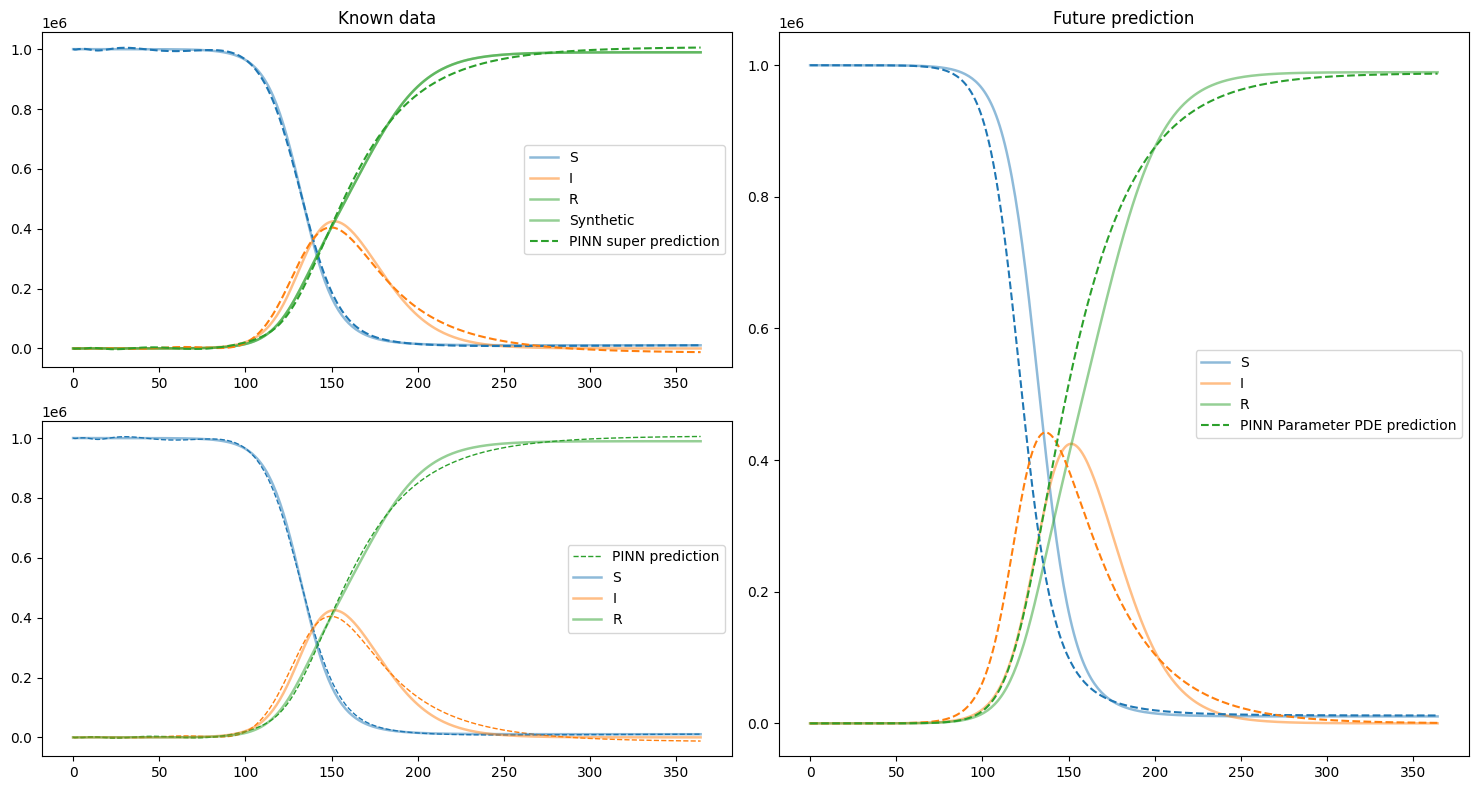

In [70]:
intermediate_train(reset=True)

Training model...

4000      [4.32e-05, 4.53e-05, 1.31e-05, 2.41e-06, 6.56e-06, 2.40e-07, 7.73e-05, 1.61e-04, 2.27e-04, 3.65e-06, 0.00e+00, 3.33e-06]    [4.32e-05, 4.53e-05, 1.31e-05, 2.41e-06, 6.56e-06, 2.40e-07, 7.73e-05, 1.61e-04, 2.27e-04, 3.65e-06, 0.00e+00, 3.33e-06]    []  

Best model at step 4260:
  train loss: 1.80e-05
  test loss: 1.80e-05
  test metric: []

'train' took 23.257654 s

Best train step: 4260
alpha: 0.15892842412
beta: 0.032498847693
{'alpha': 0.17, 'beta': 0.07, 'kappa': 0.5}


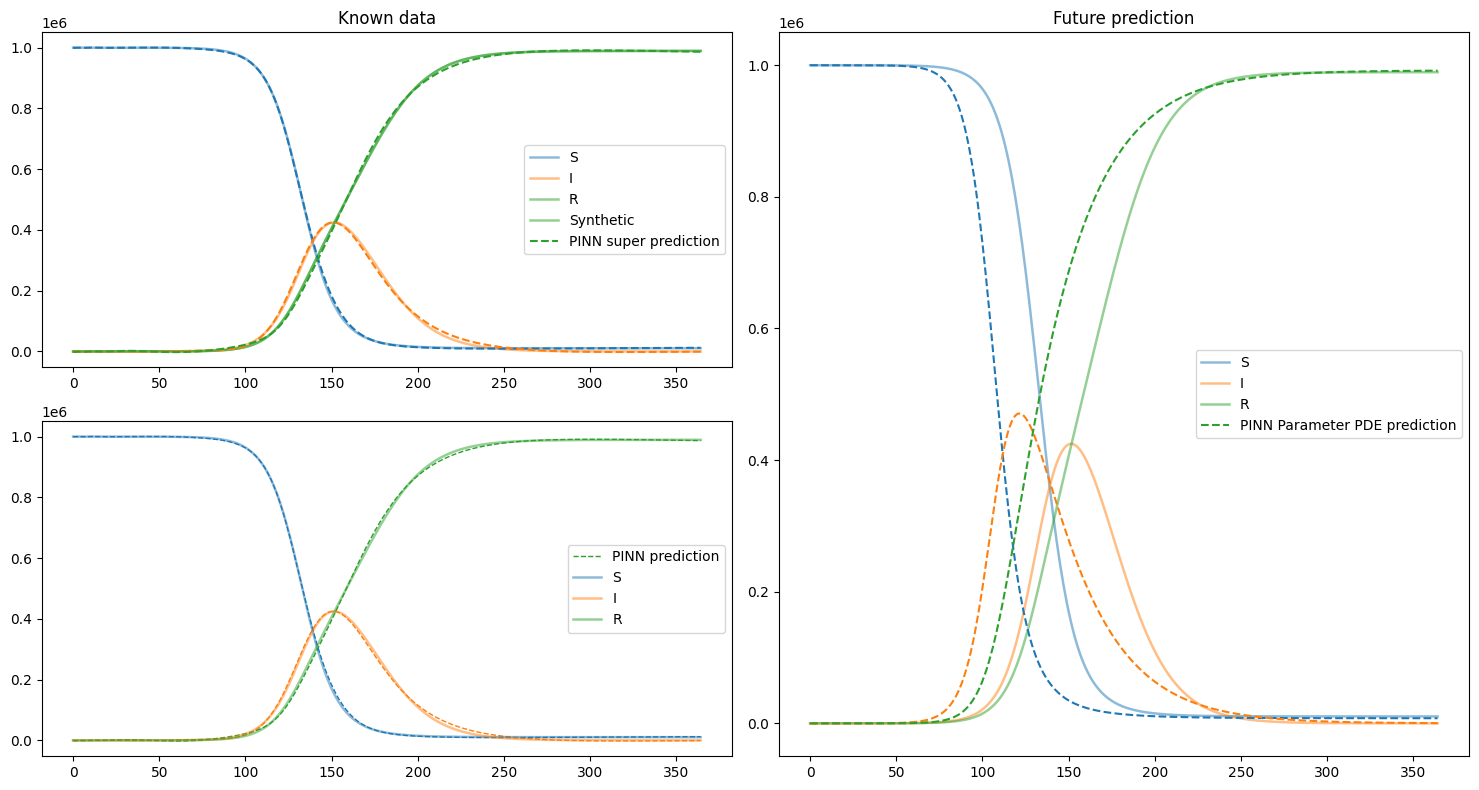

In [72]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
6000      [7.04e-06, 1.02e-05, 4.03e-06, 2.05e-09, 7.48e-09, 1.39e-09, 1.14e-05, 9.93e-06, 3.15e-06, 4.26e-07, 2.69e-07, 9.03e-08]    [7.04e-06, 1.02e-05, 4.03e-06, 2.05e-09, 7.48e-09, 1.39e-09, 1.14e-05, 9.93e-06, 3.15e-06, 4.26e-07, 2.69e-07, 9.03e-08]    []  

Best model at step 5473:
  train loss: 1.71e-05
  test loss: 1.71e-05
  test metric: []

'train' took 23.486387 s

Best train step: 5473
alpha: 0.1592362076
beta: 0.032682236284
{'alpha': 0.17, 'beta': 0.07, 'kappa': 0.5}


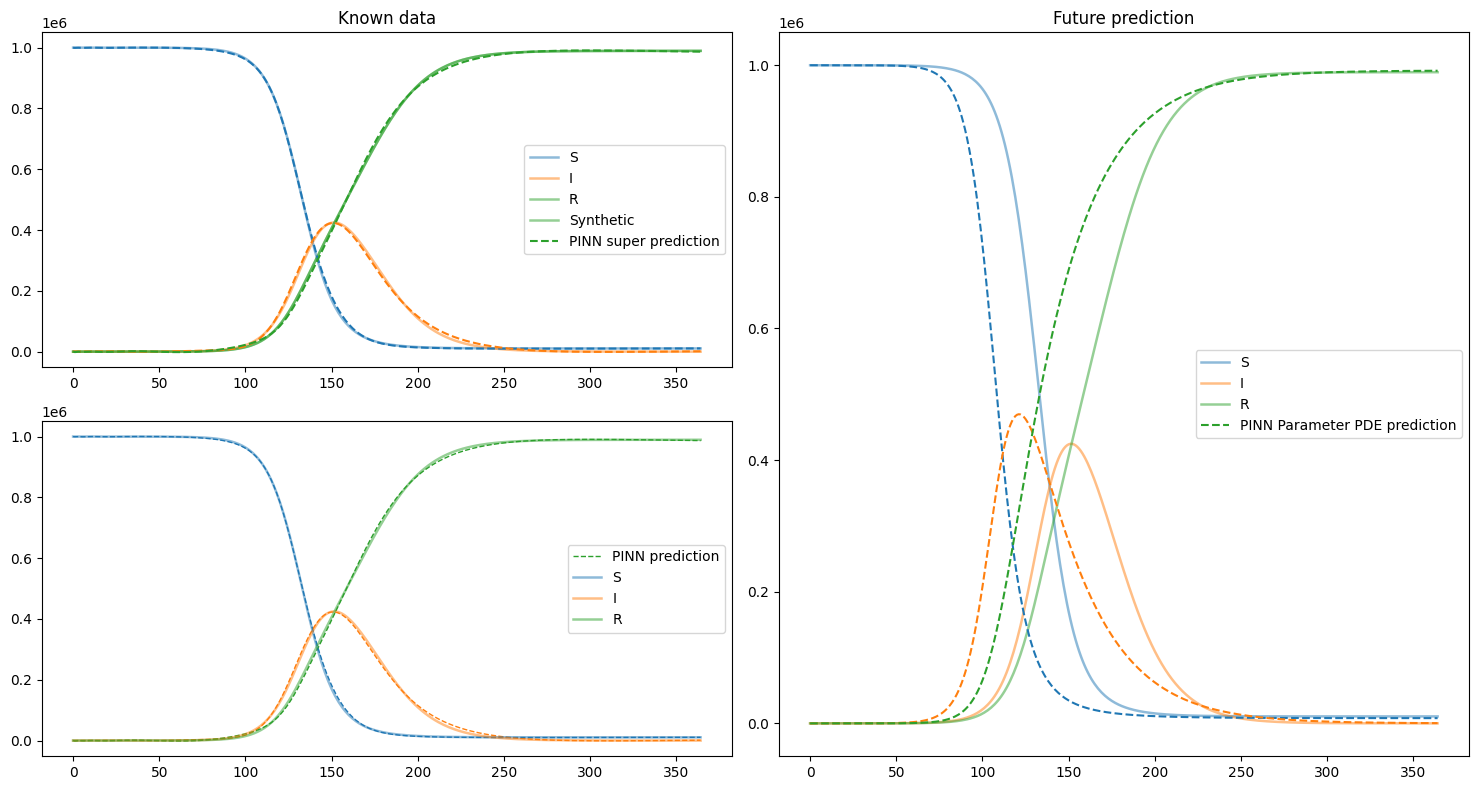

In [73]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
8000      [7.22e-07, 5.77e-06, 6.62e-06, 6.11e-09, 6.46e-13, 1.53e-09, 8.71e-07, 3.54e-06, 3.04e-06, 8.11e-08, 6.45e-08, 4.45e-09]    [7.22e-07, 5.77e-06, 6.62e-06, 6.11e-09, 6.46e-13, 1.53e-09, 8.71e-07, 3.54e-06, 3.04e-06, 8.11e-08, 6.45e-08, 4.45e-09]    []  

Best model at step 5473:
  train loss: 1.71e-05
  test loss: 1.71e-05
  test metric: []

'train' took 22.203962 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
10000     [7.87e-06, 9.19e-06, 6.83e-06, 2.

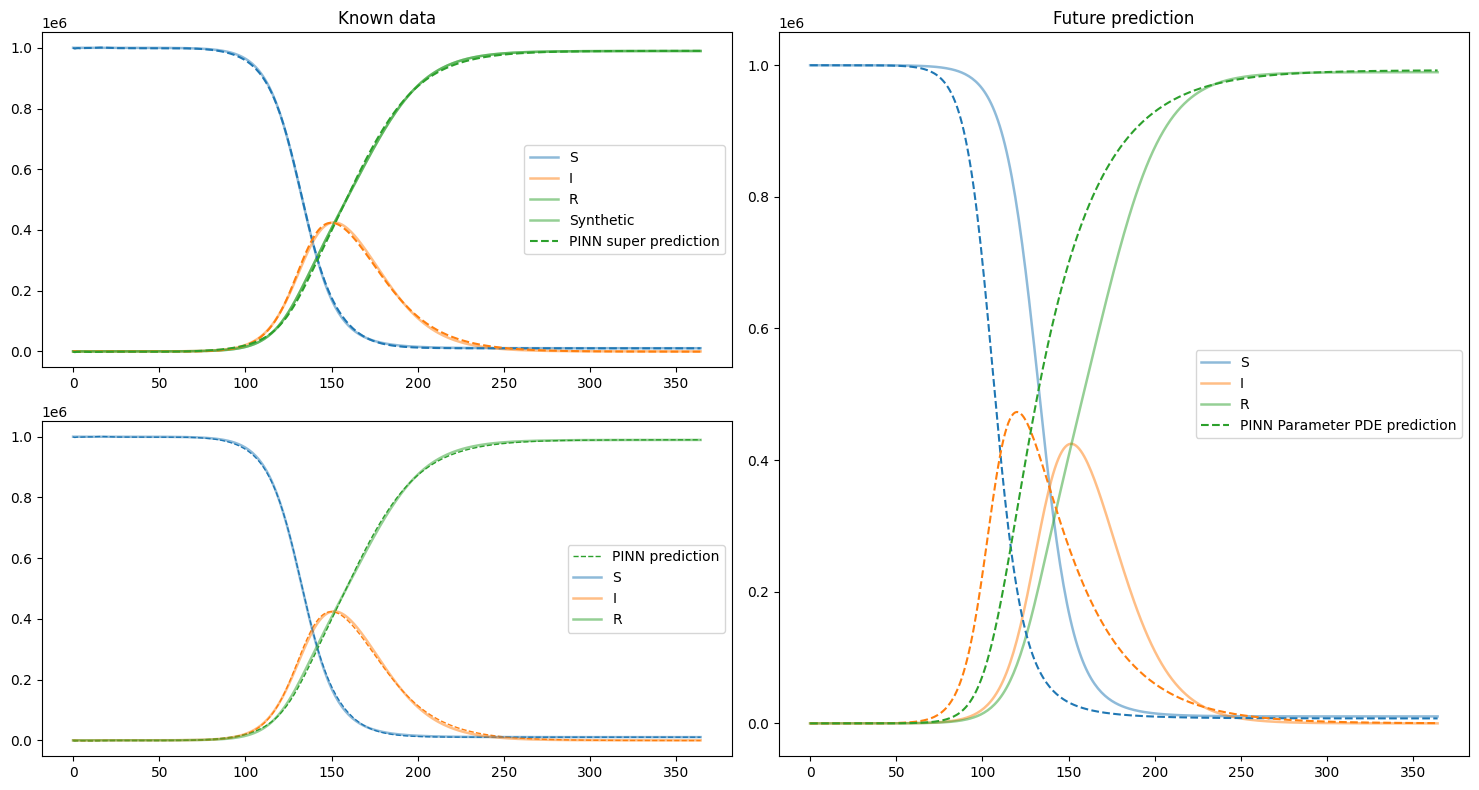

In [74]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
14000     [1.79e-06, 7.06e-06, 6.30e-06, 4.43e-10, 1.69e-10, 6.35e-10, 1.57e-06, 1.18e-06, 1.74e-06, 1.72e-07, 3.80e-08, 4.03e-09]    [1.79e-06, 7.06e-06, 6.30e-06, 4.43e-10, 1.69e-10, 6.35e-10, 1.57e-06, 1.18e-06, 1.74e-06, 1.72e-07, 3.80e-08, 4.03e-09]    []  

Best model at step 13511:
  train loss: 1.53e-05
  test loss: 1.53e-05
  test metric: []

'train' took 22.112217 s

Best train step: 13511
alpha: 0.16149067879
beta: 0.032825432718
{'alpha': 0.17, 'beta': 0.07, 'kappa': 0.5}


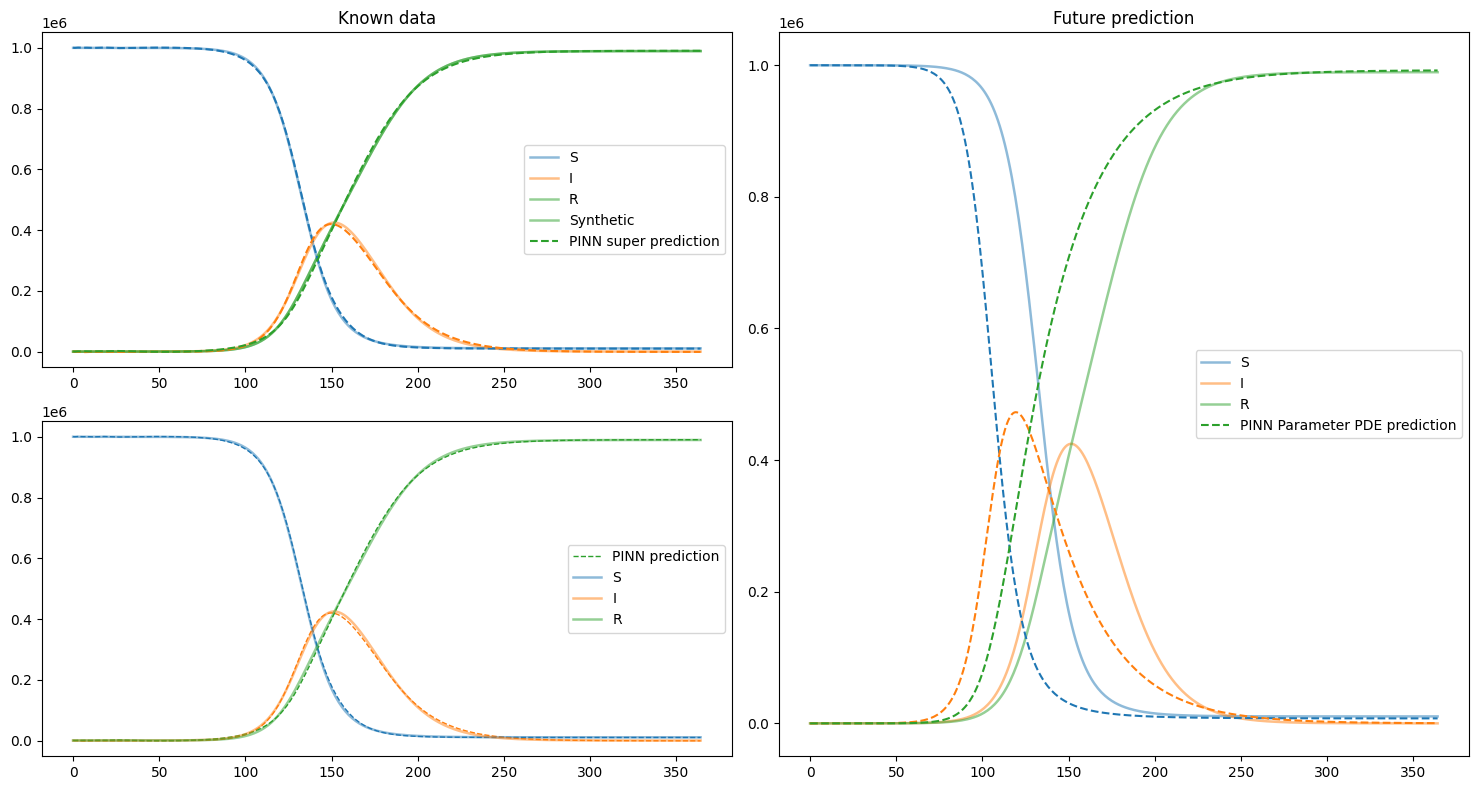

In [75]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
16000     [2.85e-06, 5.74e-06, 7.10e-06, 1.54e-07, 6.18e-08, 5.30e-08, 3.02e-05, 2.65e-05, 2.89e-05, 2.17e-06, 1.05e-06, 6.76e-10]    [2.85e-06, 5.74e-06, 7.10e-06, 1.54e-07, 6.18e-08, 5.30e-08, 3.02e-05, 2.65e-05, 2.89e-05, 2.17e-06, 1.05e-06, 6.76e-10]    []  

Best model at step 13511:
  train loss: 1.53e-05
  test loss: 1.53e-05
  test metric: []

'train' took 20.680883 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
18000     [9.85e-06, 8.18e-06, 8.78e-06, 1

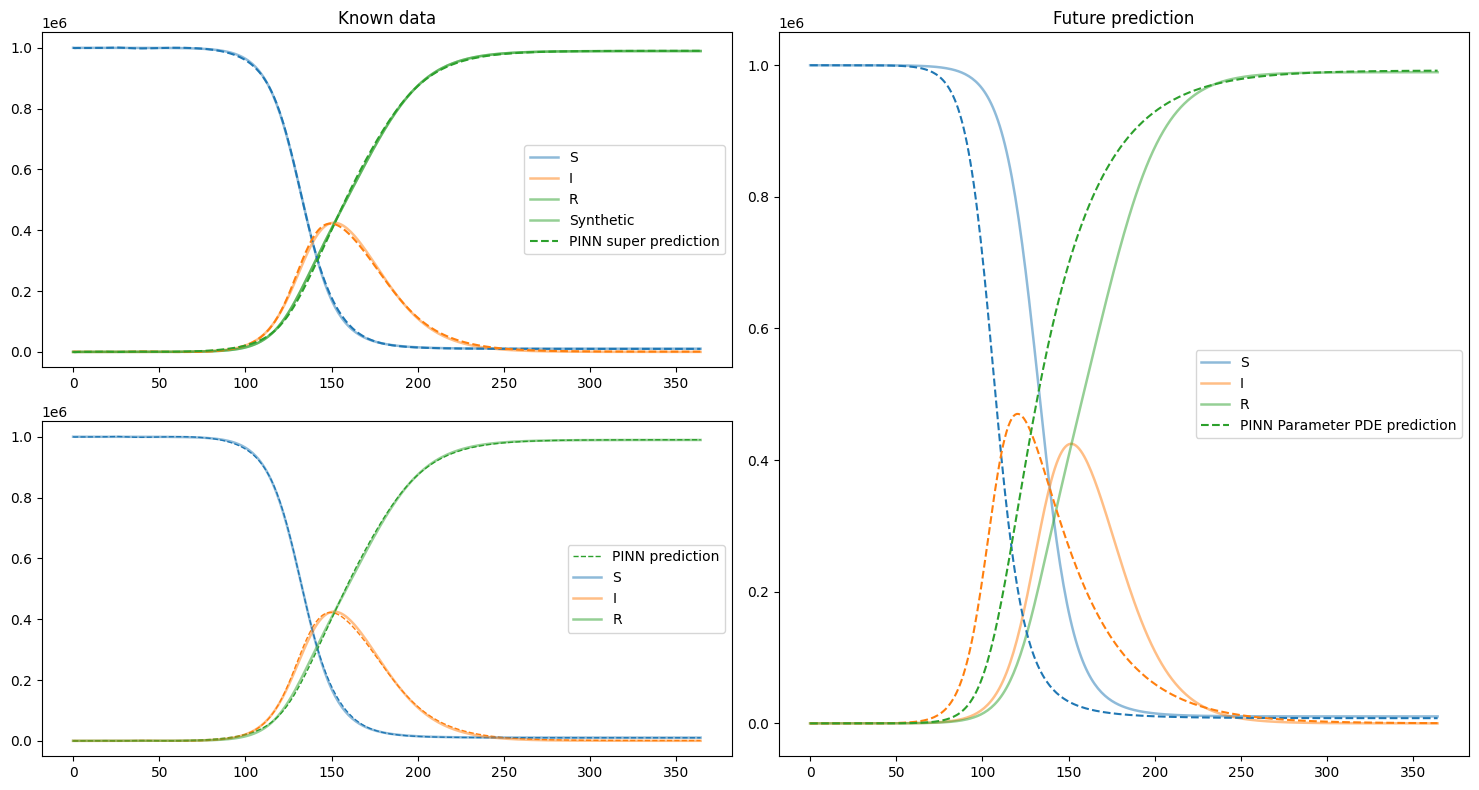

In [76]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
20000     [1.74e-06, 6.60e-06, 5.48e-06, 1.23e-09, 3.10e-08, 4.43e-10, 1.85e-05, 7.70e-06, 7.71e-06, 1.10e-05, 0.00e+00, 7.27e-09]    [1.74e-06, 6.60e-06, 5.48e-06, 1.23e-09, 3.10e-08, 4.43e-10, 1.85e-05, 7.70e-06, 7.71e-06, 1.10e-05, 0.00e+00, 7.27e-09]    []  

Best model at step 18890:
  train loss: 1.45e-05
  test loss: 1.45e-05
  test metric: []

'train' took 19.586074 s

Best train step: 18890
alpha: 0.1608017534
beta: 0.03274063766
{'alpha': 0.17, 'beta': 0.07, 'kappa': 0.5}


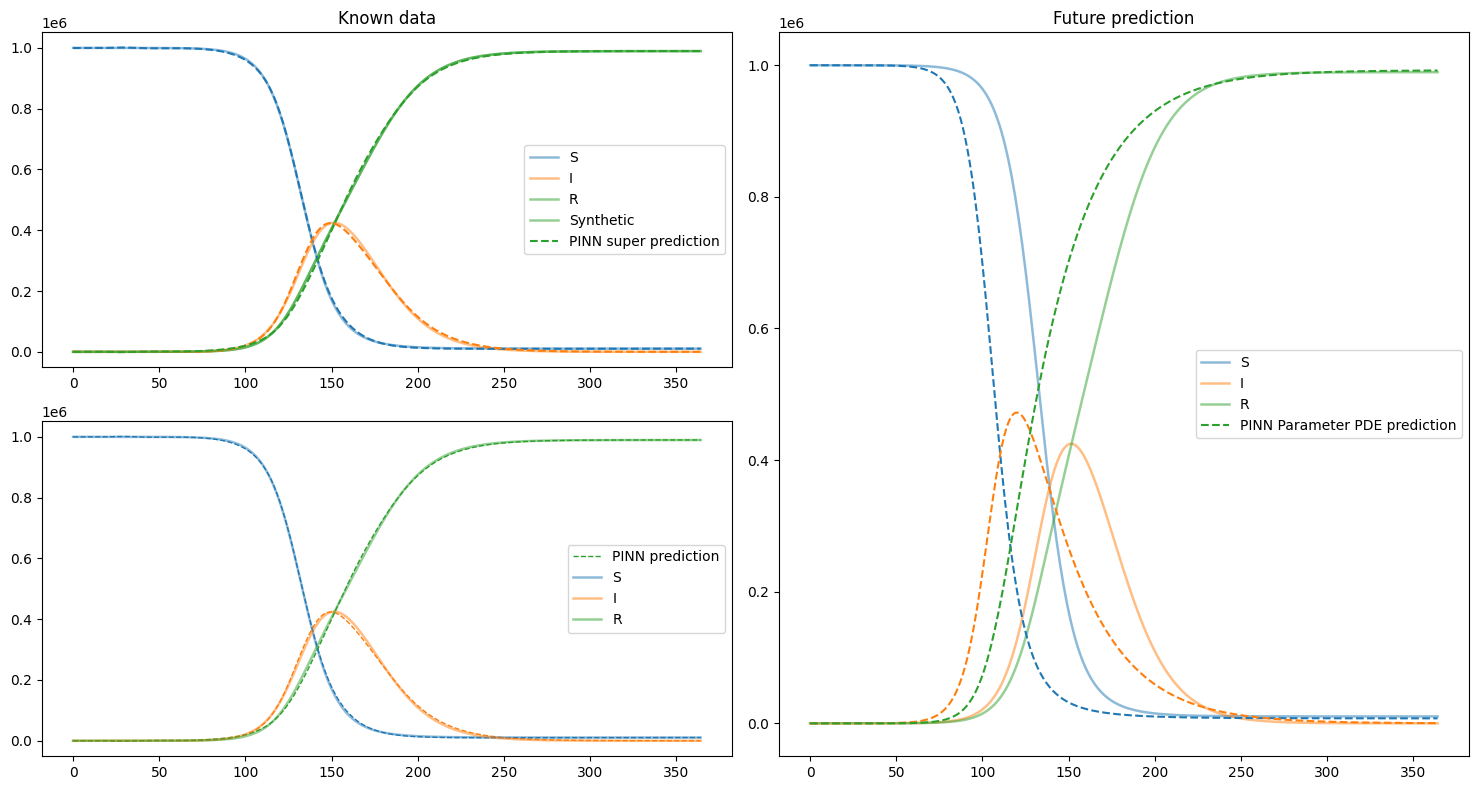

In [77]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
22000     [6.34e-07, 5.68e-06, 6.23e-06, 3.99e-07, 2.54e-08, 9.76e-08, 1.13e-05, 1.29e-05, 1.74e-05, 9.30e-07, 1.65e-07, 2.88e-10]    [6.34e-07, 5.68e-06, 6.23e-06, 3.99e-07, 2.54e-08, 9.76e-08, 1.13e-05, 1.29e-05, 1.74e-05, 9.30e-07, 1.65e-07, 2.88e-10]    []  

Best model at step 18890:
  train loss: 1.45e-05
  test loss: 1.45e-05
  test metric: []

'train' took 19.684386 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
24000     [7.77e-06, 1.15e-05, 6.02e-06, 4

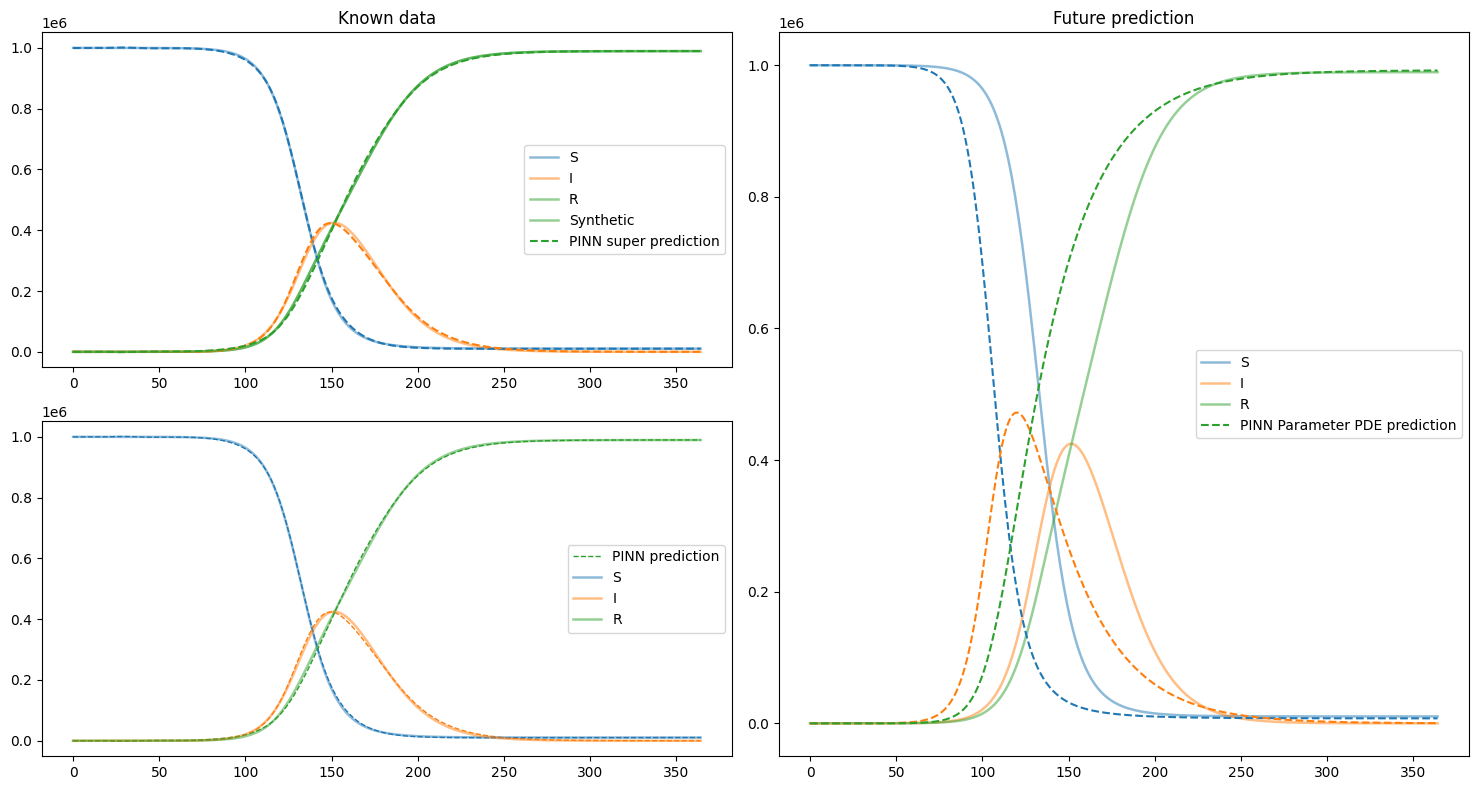

In [78]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
122000    [7.07e-07, 5.31e-06, 5.12e-06, 5.83e-07, 1.68e-06, 5.90e-07, 1.99e-06, 2.77e-06, 2.48e-06, 6.60e-06, 0.00e+00, 0.00e+00]    [7.07e-07, 5.31e-06, 5.12e-06, 5.83e-07, 1.68e-06, 5.90e-07, 1.99e-06, 2.77e-06, 2.48e-06, 6.60e-06, 0.00e+00, 0.00e+00]    []  

Best model at step 18890:
  train loss: 1.45e-05
  test loss: 1.45e-05
  test metric: []

'train' took 17.399898 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
124000    [4.30e-07, 4.63e-06, 5.83e-06, 1

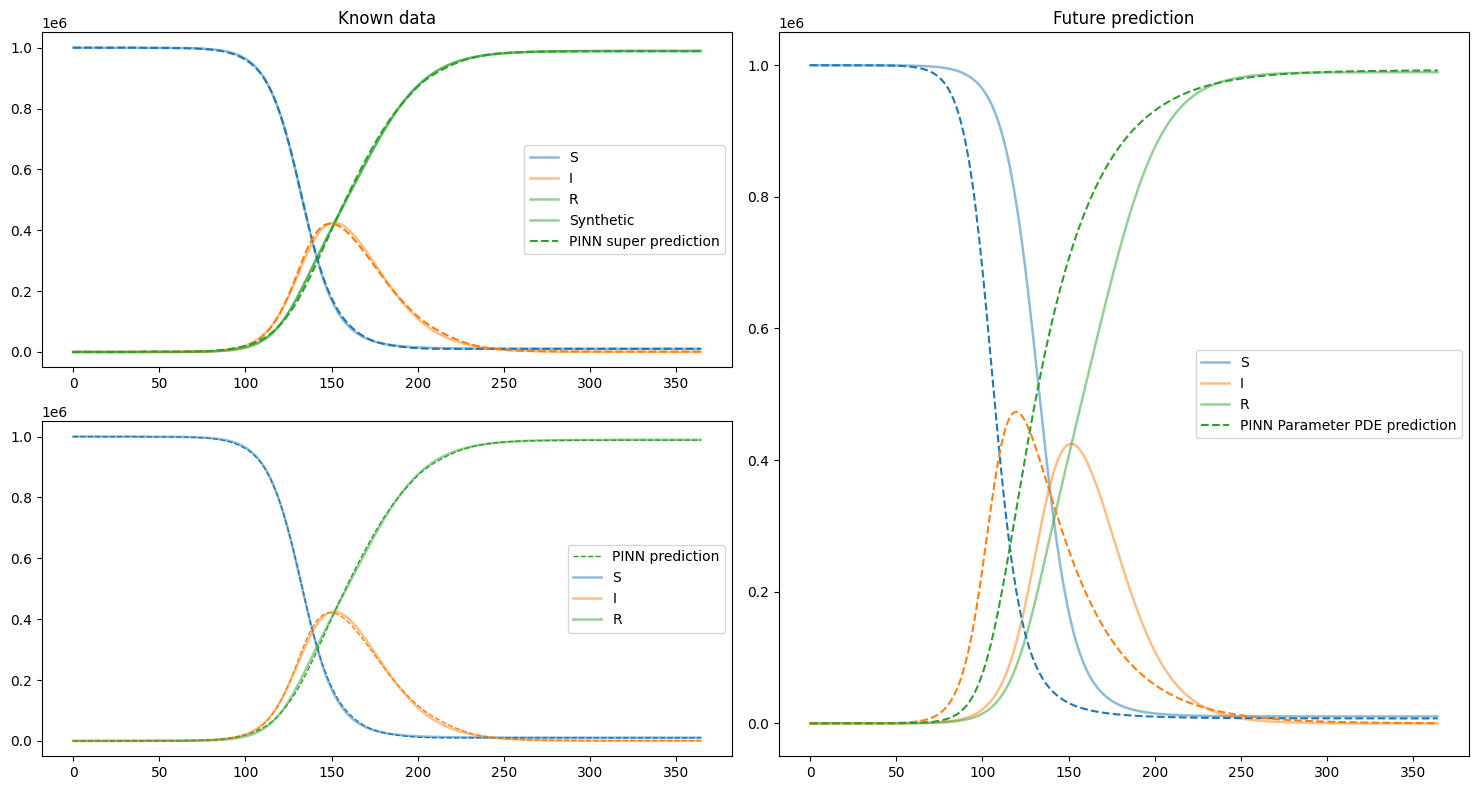

In [79]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
136000    [1.77e-06, 4.39e-06, 5.82e-06, 1.18e-06, 7.25e-08, 5.58e-07, 4.02e-06, 5.61e-06, 4.05e-06, 1.40e-06, 1.22e-07, 7.15e-09]    [1.77e-06, 4.39e-06, 5.82e-06, 1.18e-06, 7.25e-08, 5.58e-07, 4.02e-06, 5.61e-06, 4.05e-06, 1.40e-06, 1.22e-07, 7.15e-09]    []  

Best model at step 134192:
  train loss: 1.45e-05
  test loss: 1.45e-05
  test metric: []

'train' took 15.731495 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
138000    [2.79e-06, 8.71e-06, 1.14e-05, 

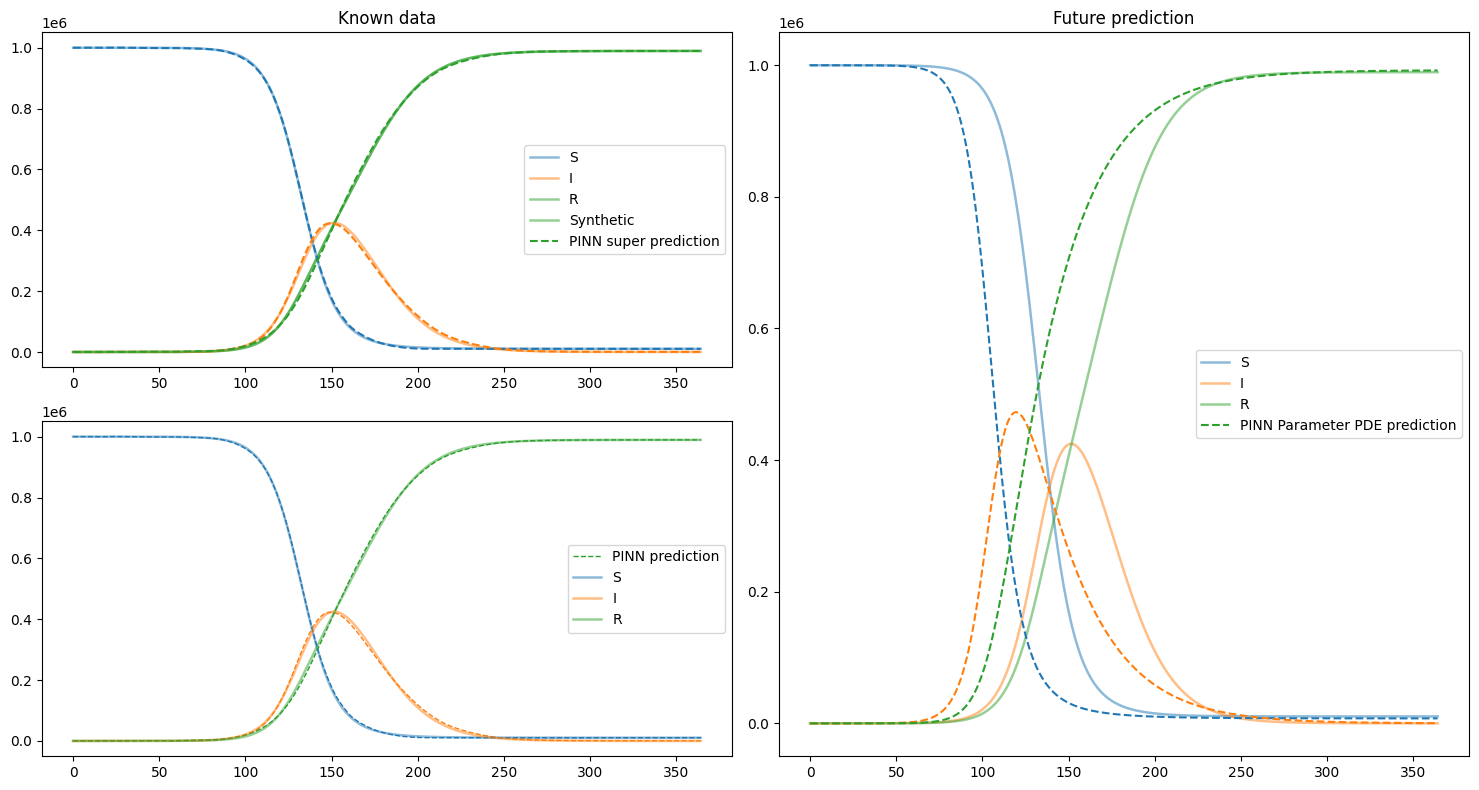

In [80]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
166000    [9.18e-06, 6.84e-06, 6.50e-06, 5.27e-06, 4.47e-06, 3.42e-06, 5.17e-06, 5.97e-06, 4.84e-06, 2.88e-05, 1.20e-06, 5.00e-07]    [9.18e-06, 6.84e-06, 6.50e-06, 5.27e-06, 4.47e-06, 3.42e-06, 5.17e-06, 5.97e-06, 4.84e-06, 2.88e-05, 1.20e-06, 5.00e-07]    []  

Best model at step 165741:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 16.109294 s

Best train step: 165741
alpha: 0.16143573821
beta: 0.032748430967
{'alpha': 0.17, 'beta': 0.07, 'kappa': 0.5}


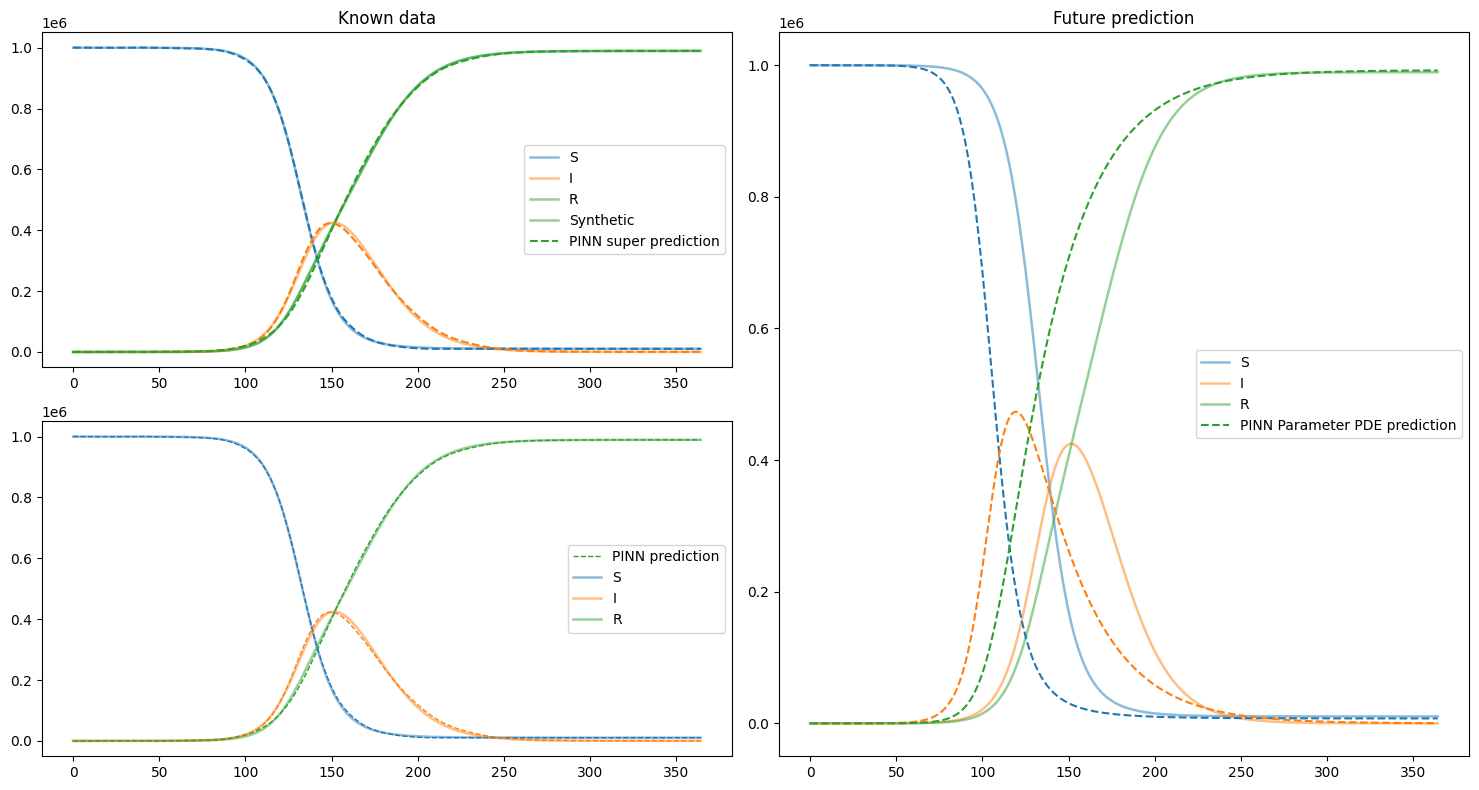

In [81]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
168000    [3.42e-06, 5.82e-06, 4.59e-06, 2.22e-06, 2.06e-06, 2.07e-06, 2.78e-06, 6.42e-06, 3.37e-06, 1.45e-05, 0.00e+00, 0.00e+00]    [3.42e-06, 5.82e-06, 4.59e-06, 2.22e-06, 2.06e-06, 2.07e-06, 2.78e-06, 6.42e-06, 3.37e-06, 1.45e-05, 0.00e+00, 0.00e+00]    []  

Best model at step 165741:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 16.769067 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
170000    [5.79e-06, 9.56e-06, 4.33e-06, 

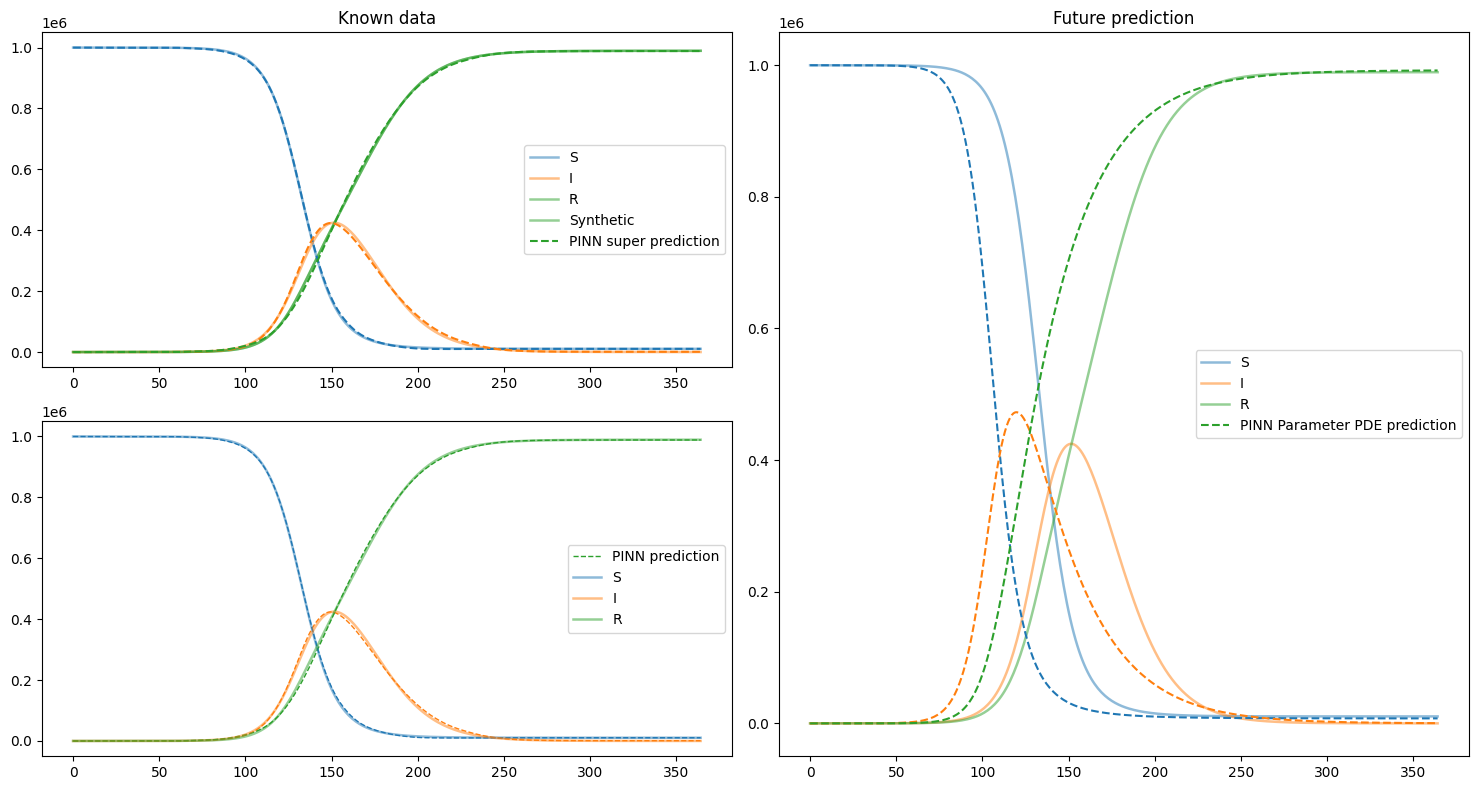

In [82]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
246000    [6.63e-06, 1.12e-05, 7.40e-06, 4.57e-06, 2.80e-07, 2.50e-07, 3.41e-06, 1.01e-05, 3.15e-06, 7.47e-06, 0.00e+00, 0.00e+00]    [6.63e-06, 1.12e-05, 7.40e-06, 4.57e-06, 2.80e-07, 2.50e-07, 3.41e-06, 1.01e-05, 3.15e-06, 7.47e-06, 0.00e+00, 0.00e+00]    []  

Best model at step 242754:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 15.483952 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
248000    [5.89e-07, 3.99e-06, 5.26e-06, 

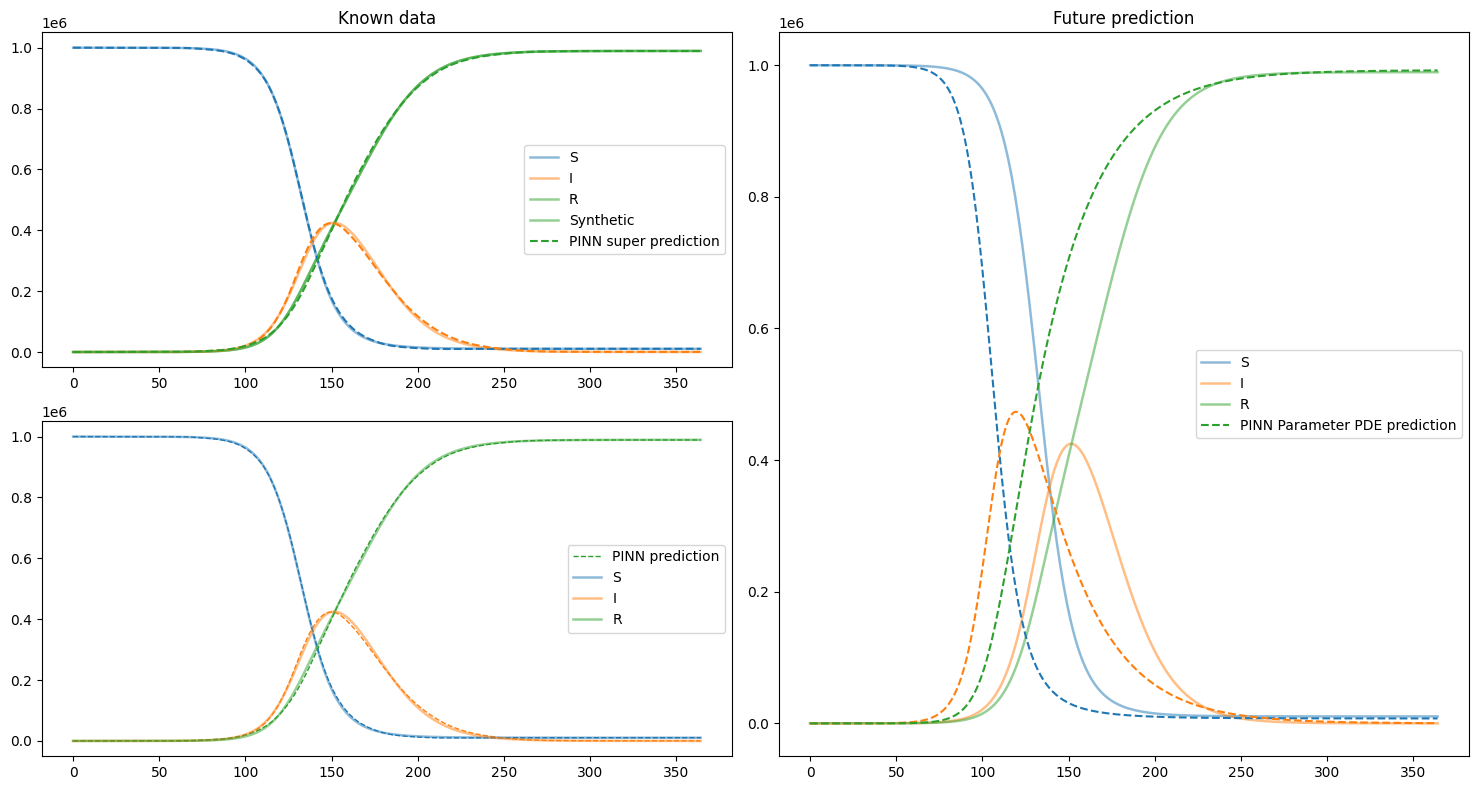

In [83]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
278000    [4.12e-07, 4.27e-06, 4.99e-06, 1.03e-07, 3.07e-10, 2.78e-08, 7.41e-06, 3.01e-06, 9.90e-06, 7.84e-07, 1.02e-08, 2.72e-11]    [4.12e-07, 4.27e-06, 4.99e-06, 1.03e-07, 3.07e-10, 2.78e-08, 7.41e-06, 3.01e-06, 9.90e-06, 7.84e-07, 1.02e-08, 2.72e-11]    []  

Best model at step 275118:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 20.578115 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
280000    [2.50e-06, 6.28e-06, 4.67e-06, 

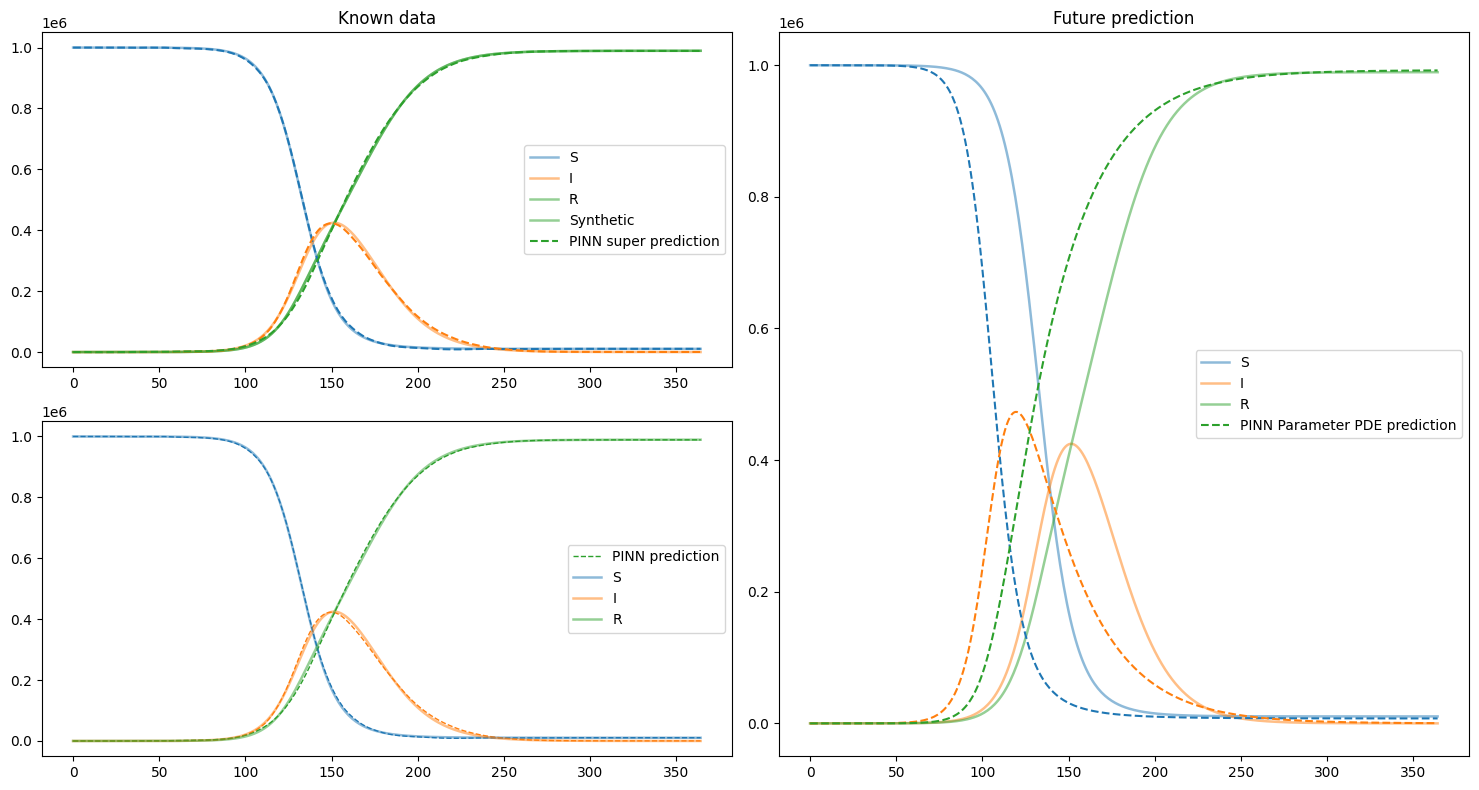

In [84]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
288000    [7.33e-07, 3.92e-06, 5.26e-06, 1.17e-07, 1.02e-07, 6.90e-08, 4.21e-07, 2.27e-06, 2.09e-06, 3.34e-07, 1.85e-08, 6.07e-09]    [7.33e-07, 3.92e-06, 5.26e-06, 1.17e-07, 1.02e-07, 6.90e-08, 4.21e-07, 2.27e-06, 2.09e-06, 3.34e-07, 1.85e-08, 6.07e-09]    []  

Best model at step 286485:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 20.286702 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
290000    [2.73e-06, 6.56e-06, 5.51e-06, 

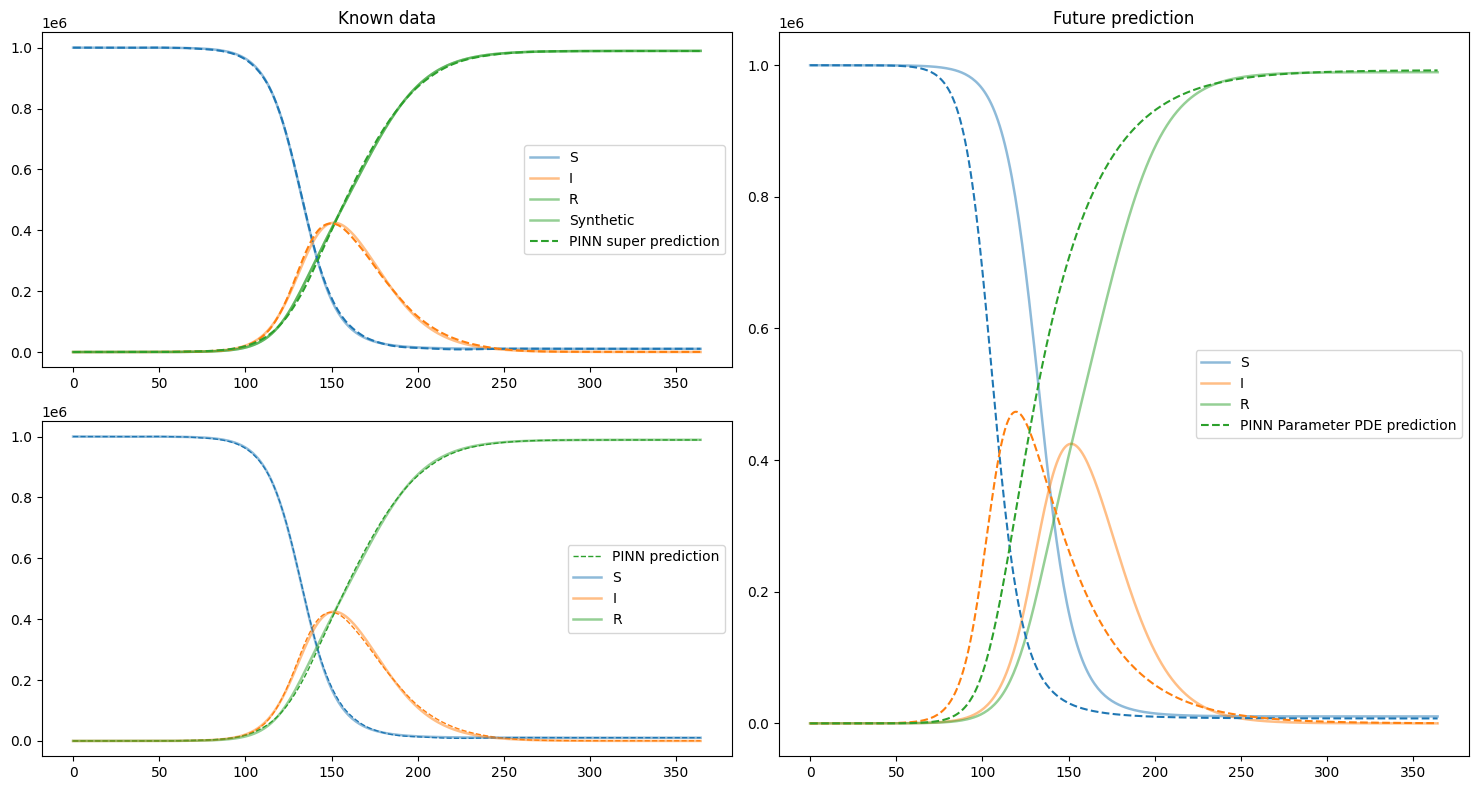

In [85]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
292000    [1.24e-06, 3.91e-06, 5.43e-06, 3.48e-07, 2.96e-07, 2.01e-07, 5.53e-07, 2.58e-06, 2.21e-06, 1.37e-06, 6.91e-08, 2.47e-08]    [1.24e-06, 3.91e-06, 5.43e-06, 3.48e-07, 2.96e-07, 2.01e-07, 5.53e-07, 2.58e-06, 2.21e-06, 1.37e-06, 6.91e-08, 2.47e-08]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 15.925157 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
294000    [3.75e-07, 4.18e-06, 5.11e-06, 

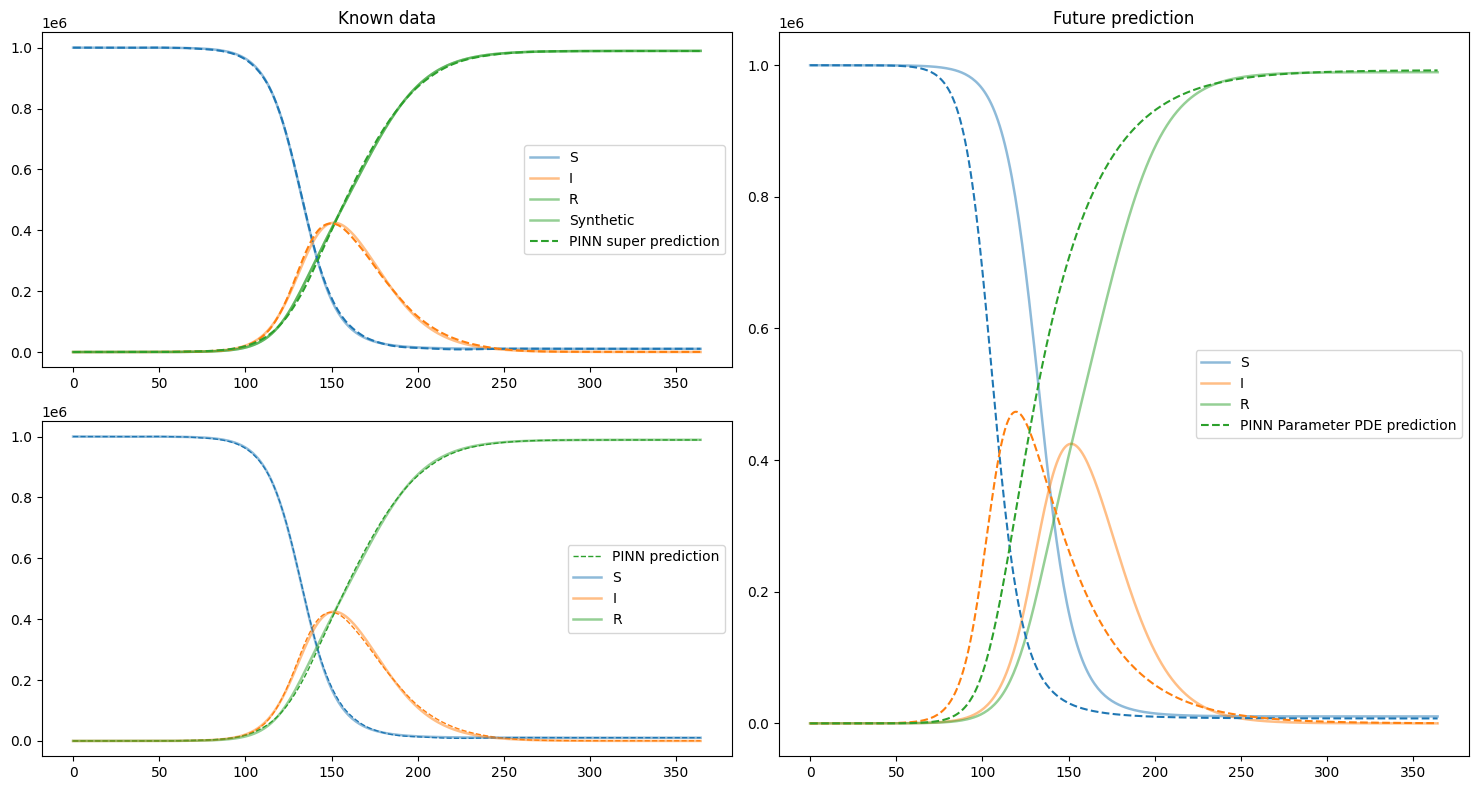

In [86]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
392000    [6.62e-07, 4.29e-06, 5.35e-06, 2.94e-07, 5.66e-08, 2.10e-07, 5.21e-07, 3.71e-06, 5.65e-06, 2.54e-06, 6.84e-11, 0.00e+00]    [6.62e-07, 4.29e-06, 5.35e-06, 2.94e-07, 5.66e-08, 2.10e-07, 5.21e-07, 3.71e-06, 5.65e-06, 2.54e-06, 6.84e-11, 0.00e+00]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 16.004069 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
394000    [9.53e-07, 3.79e-06, 5.81e-06, 

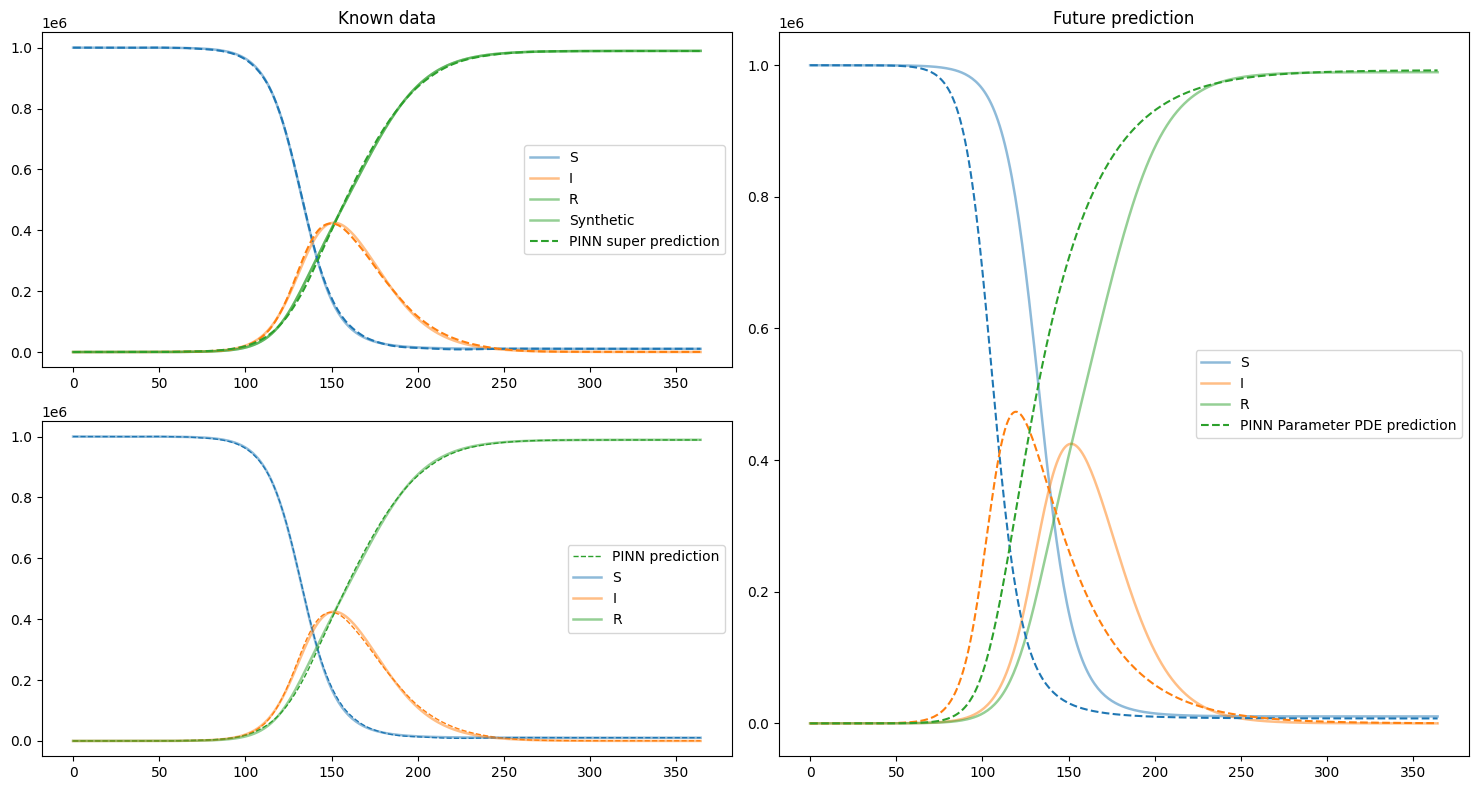

In [87]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
492000    [5.38e-07, 4.05e-06, 5.39e-06, 4.31e-08, 2.22e-08, 2.24e-08, 3.73e-07, 2.59e-06, 1.96e-06, 1.25e-07, 3.22e-09, 3.55e-10]    [5.38e-07, 4.05e-06, 5.39e-06, 4.31e-08, 2.22e-08, 2.24e-08, 3.73e-07, 2.59e-06, 1.96e-06, 1.25e-07, 3.22e-09, 3.55e-10]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 16.334871 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
494000    [1.34e-06, 4.69e-06, 5.70e-06, 

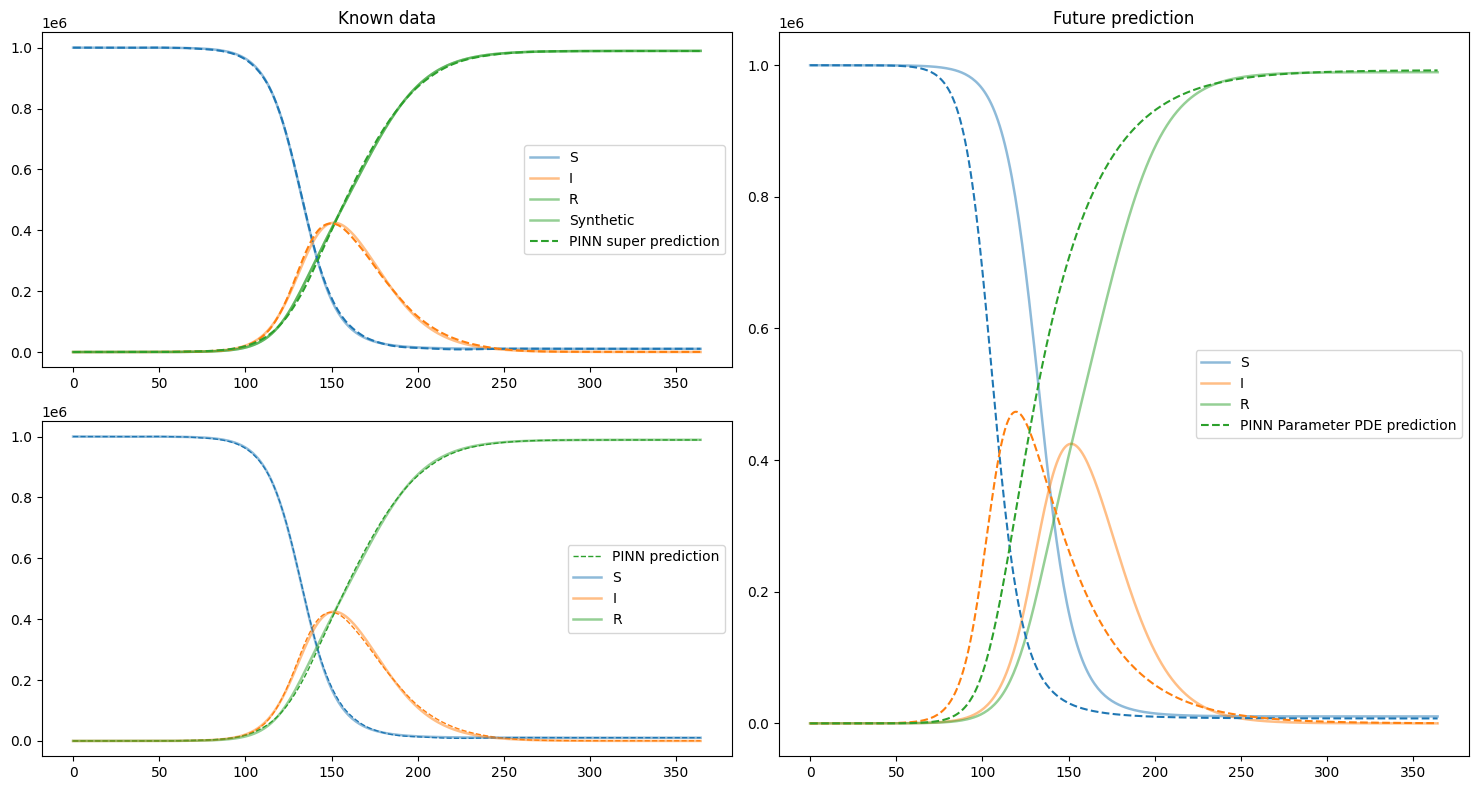

In [88]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
592000    [3.49e-06, 7.65e-06, 4.77e-06, 4.12e-06, 3.18e-06, 1.89e-06, 1.12e-06, 5.48e-06, 4.30e-06, 1.48e-05, 0.00e+00, 0.00e+00]    [3.49e-06, 7.65e-06, 4.77e-06, 4.12e-06, 3.18e-06, 1.89e-06, 1.12e-06, 5.48e-06, 4.30e-06, 1.48e-05, 0.00e+00, 0.00e+00]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 16.629424 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
594000    [6.06e-07, 4.18e-06, 5.46e-06, 

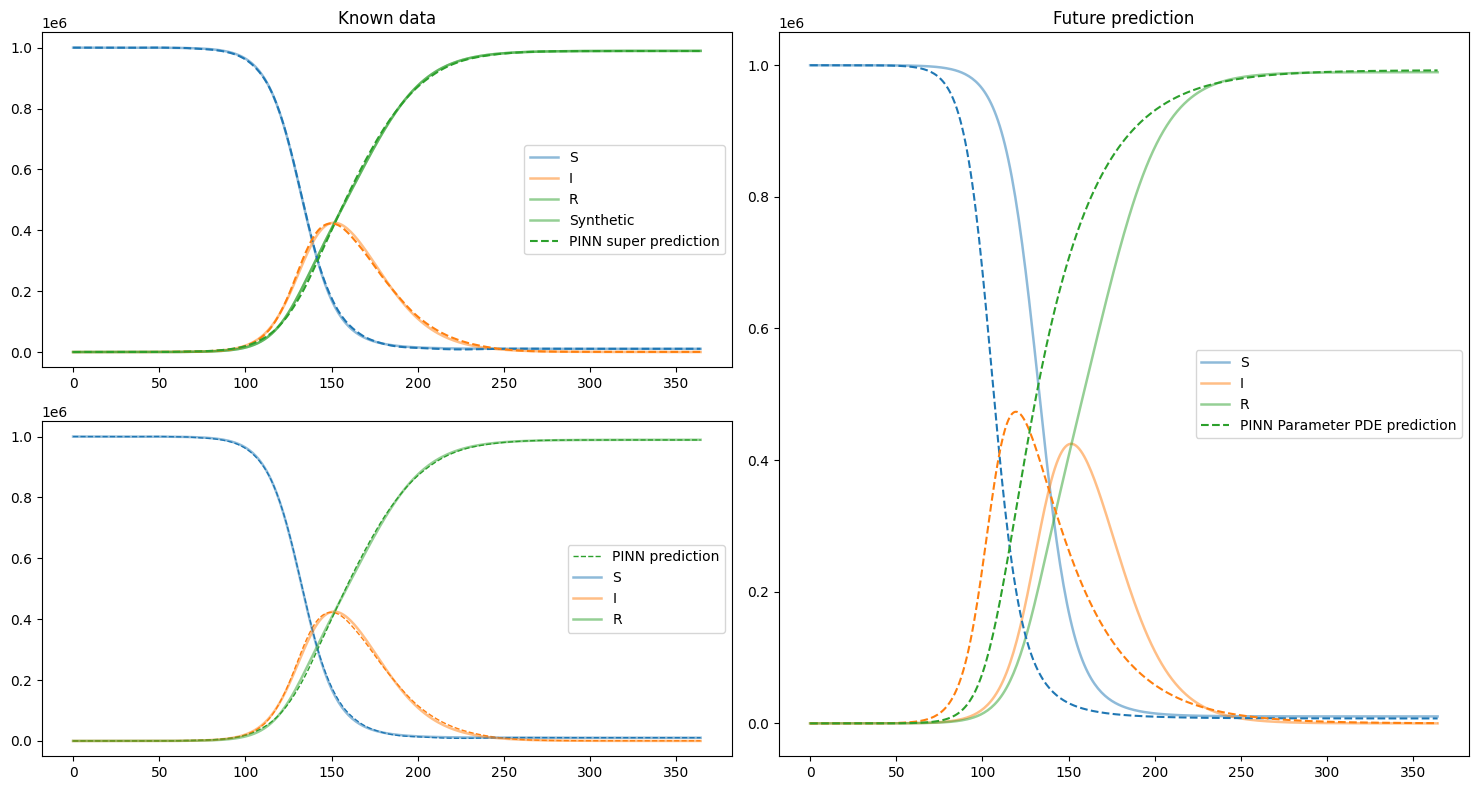

In [89]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
692000    [3.99e-07, 4.47e-06, 5.16e-06, 7.27e-08, 1.43e-08, 7.56e-08, 7.04e-07, 2.26e-06, 1.97e-06, 7.51e-07, 0.00e+00, 0.00e+00]    [3.99e-07, 4.47e-06, 5.16e-06, 7.27e-08, 1.43e-08, 7.56e-08, 7.04e-07, 2.26e-06, 1.97e-06, 7.51e-07, 0.00e+00, 0.00e+00]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 25.340643 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
694000    [1.60e-05, 1.04e-05, 7.89e-06, 

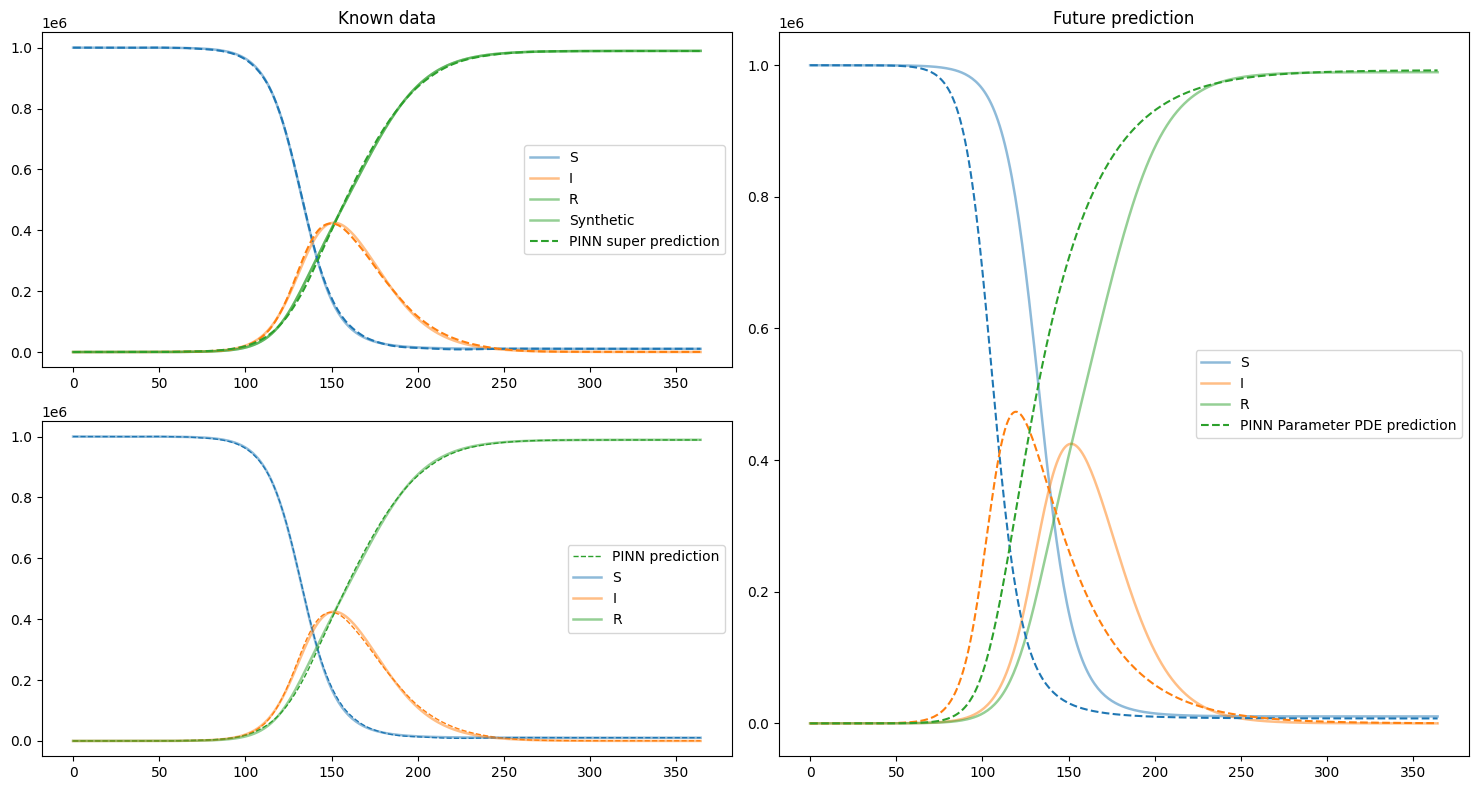

In [90]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
792000    [3.92e-05, 2.29e-05, 1.05e-05, 3.18e-05, 3.22e-05, 3.13e-05, 2.88e-05, 2.29e-05, 1.60e-05, 1.66e-04, 7.93e-06, 6.03e-06]    [3.92e-05, 2.29e-05, 1.05e-05, 3.18e-05, 3.22e-05, 3.13e-05, 2.88e-05, 2.29e-05, 1.60e-05, 1.66e-04, 7.93e-06, 6.03e-06]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 23.714053 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
794000    [2.80e-06, 6.52e-06, 4.51e-06, 

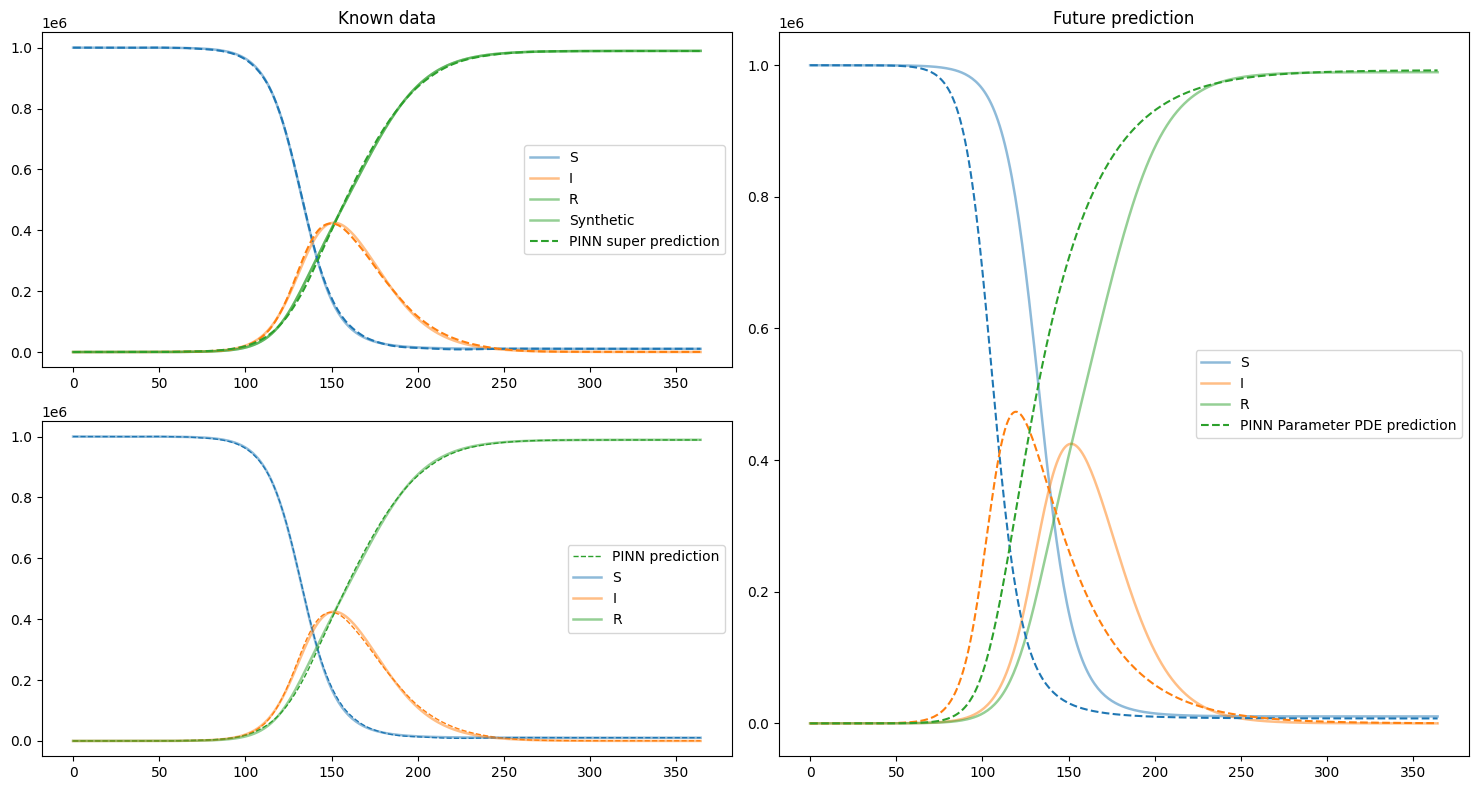

In [91]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
892000    [7.41e-07, 4.07e-06, 5.50e-06, 3.45e-08, 2.43e-08, 2.28e-09, 6.53e-07, 2.03e-06, 2.21e-06, 1.04e-07, 3.13e-09, 6.65e-11]    [7.41e-07, 4.07e-06, 5.50e-06, 3.45e-08, 2.43e-08, 2.28e-09, 6.53e-07, 2.03e-06, 2.21e-06, 1.04e-07, 3.13e-09, 6.65e-11]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 21.822219 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
894000    [5.59e-06, 4.65e-06, 8.17e-06, 

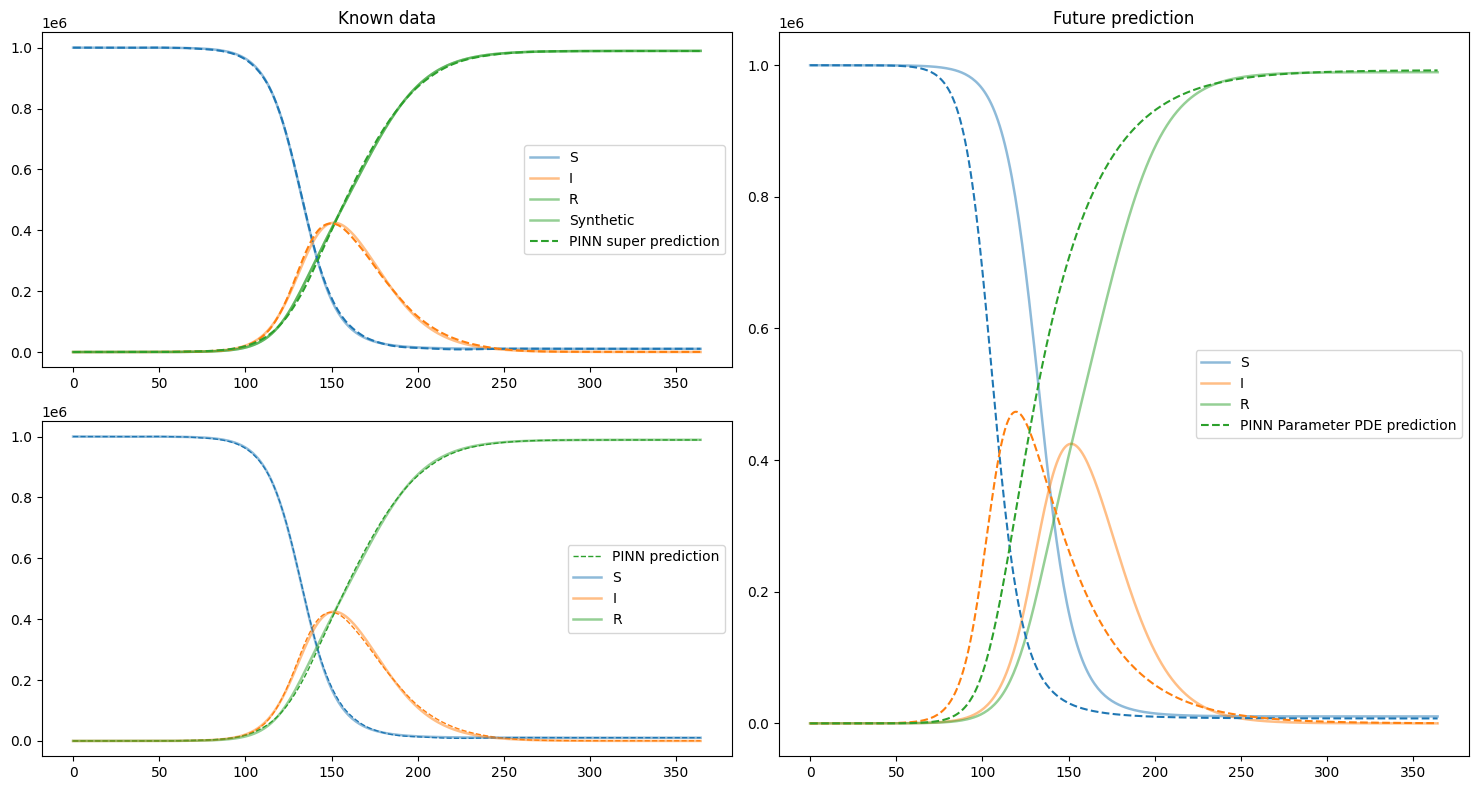

In [92]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
992000    [5.14e-07, 4.14e-06, 5.36e-06, 7.81e-10, 1.12e-10, 1.33e-09, 4.86e-07, 2.35e-06, 1.98e-06, 4.67e-08, 0.00e+00, 0.00e+00]    [5.14e-07, 4.14e-06, 5.36e-06, 7.81e-10, 1.12e-10, 1.33e-09, 4.86e-07, 2.35e-06, 1.98e-06, 4.67e-08, 0.00e+00, 0.00e+00]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 23.302342 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
994000    [5.26e-07, 4.50e-06, 5.31e-06, 

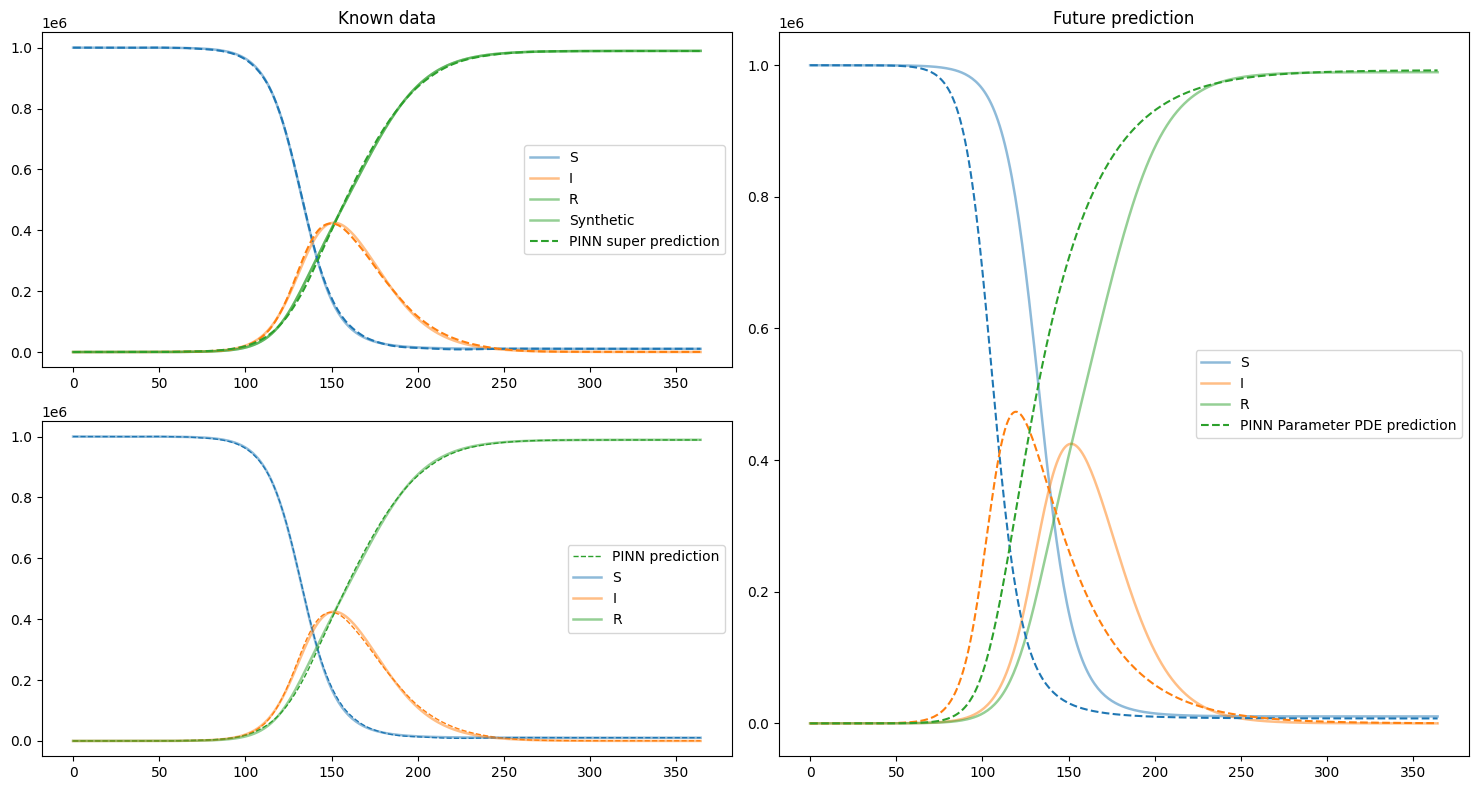

In [93]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1092000   [1.20e-05, 1.52e-05, 4.73e-06, 1.55e-05, 8.85e-06, 7.04e-06, 5.83e-06, 1.13e-05, 6.32e-06, 5.12e-05, 0.00e+00, 0.00e+00]    [1.20e-05, 1.52e-05, 4.73e-06, 1.55e-05, 8.85e-06, 7.04e-06, 5.83e-06, 1.13e-05, 6.32e-06, 5.12e-05, 0.00e+00, 0.00e+00]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 24.880543 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1094000   [4.81e-07, 4.85e-06, 4.85e-06, 

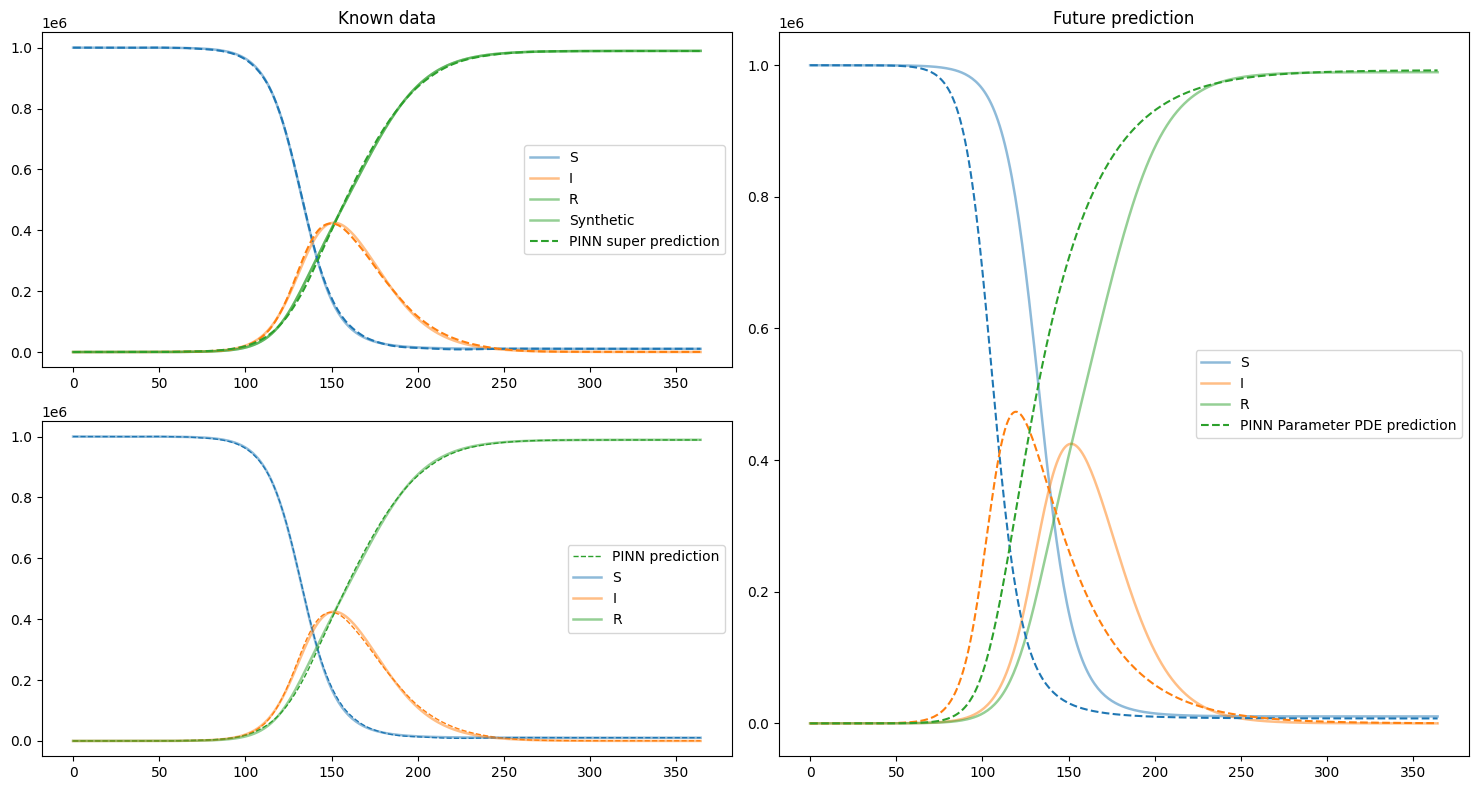

In [94]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1192000   [1.43e-06, 3.81e-06, 5.59e-06, 2.22e-07, 2.26e-07, 3.28e-07, 5.01e-07, 2.79e-06, 2.04e-06, 1.04e-06, 5.78e-08, 5.56e-09]    [1.43e-06, 3.81e-06, 5.59e-06, 2.22e-07, 2.26e-07, 3.28e-07, 5.01e-07, 2.79e-06, 2.04e-06, 1.04e-06, 5.78e-08, 5.56e-09]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 27.802473 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1194000   [4.91e-07, 4.08e-06, 5.24e-06, 

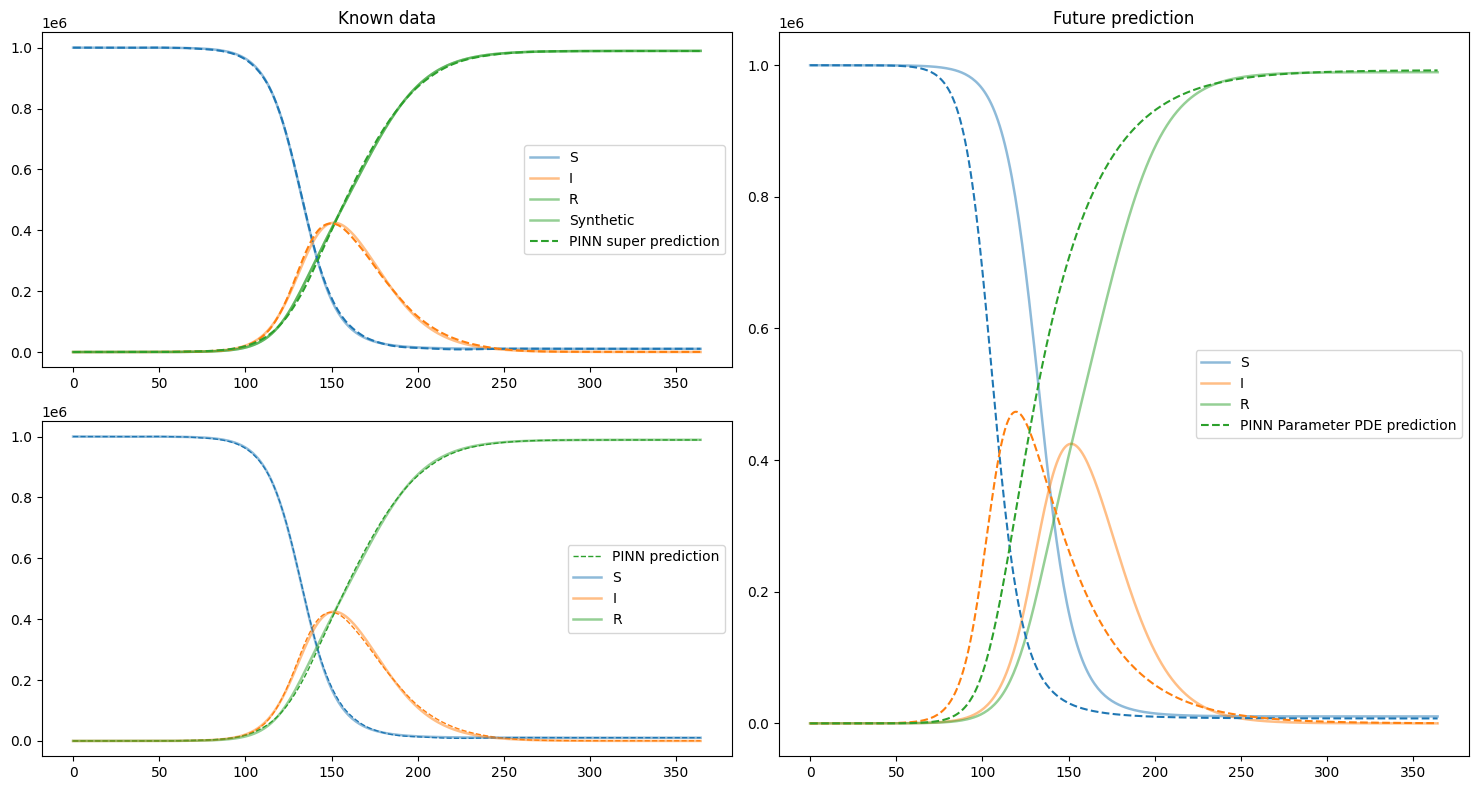

In [95]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1292000   [7.25e-07, 4.03e-06, 5.43e-06, 2.40e-08, 4.70e-08, 5.19e-09, 3.86e-07, 2.17e-06, 2.22e-06, 1.22e-07, 4.83e-09, 8.02e-10]    [7.25e-07, 4.03e-06, 5.43e-06, 2.40e-08, 4.70e-08, 5.19e-09, 3.86e-07, 2.17e-06, 2.22e-06, 1.22e-07, 4.83e-09, 8.02e-10]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 28.183108 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1294000   [1.34e-05, 1.13e-05, 3.59e-06, 

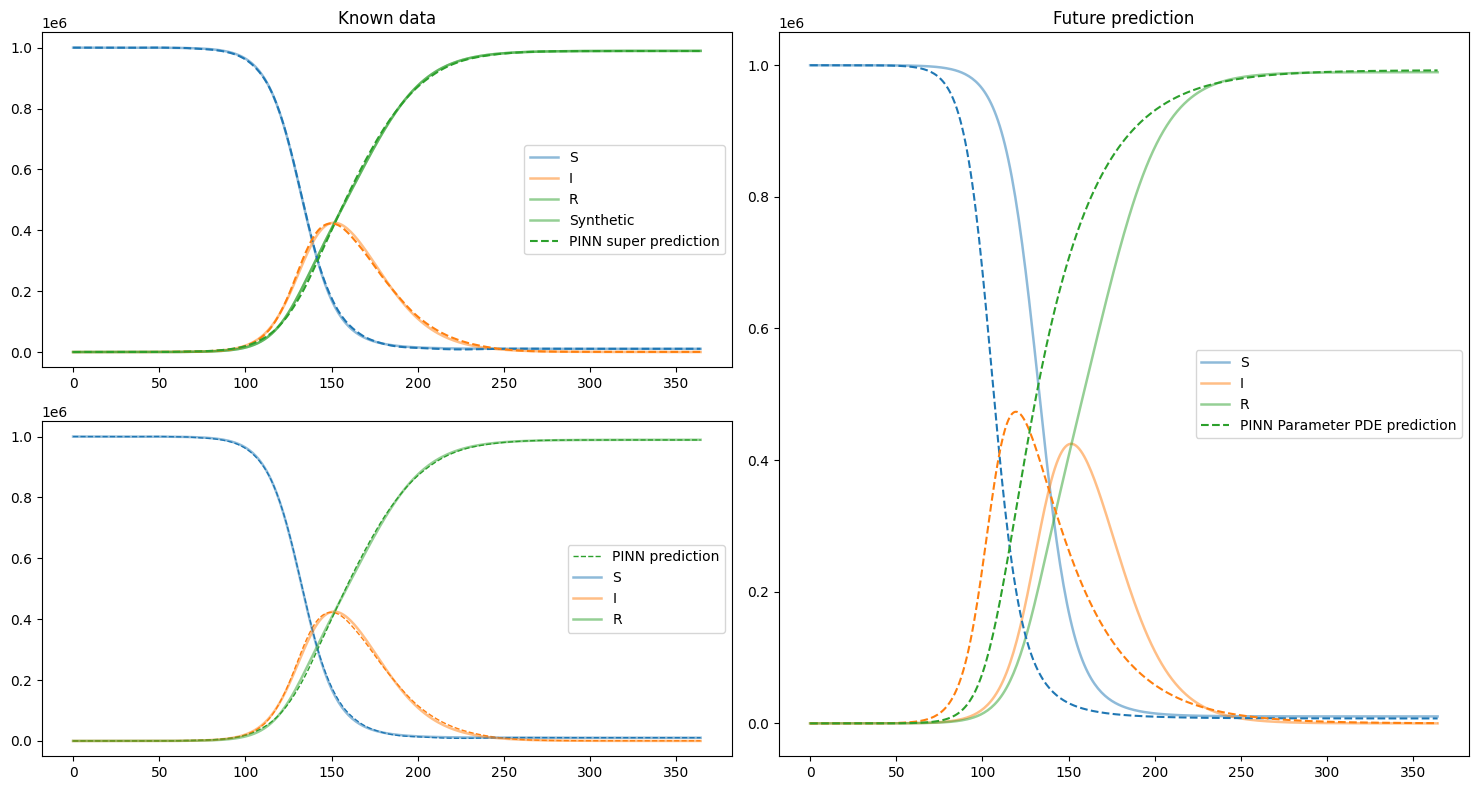

In [96]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1392000   [4.43e-07, 4.10e-06, 5.28e-06, 6.21e-11, 2.40e-12, 7.47e-12, 4.02e-07, 2.25e-06, 1.99e-06, 3.47e-08, 3.51e-12, 6.58e-15]    [4.43e-07, 4.10e-06, 5.28e-06, 6.21e-11, 2.40e-12, 7.47e-12, 4.02e-07, 2.25e-06, 1.99e-06, 3.47e-08, 3.51e-12, 6.58e-15]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 29.690374 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1394000   [8.07e-06, 6.51e-06, 6.54e-06, 

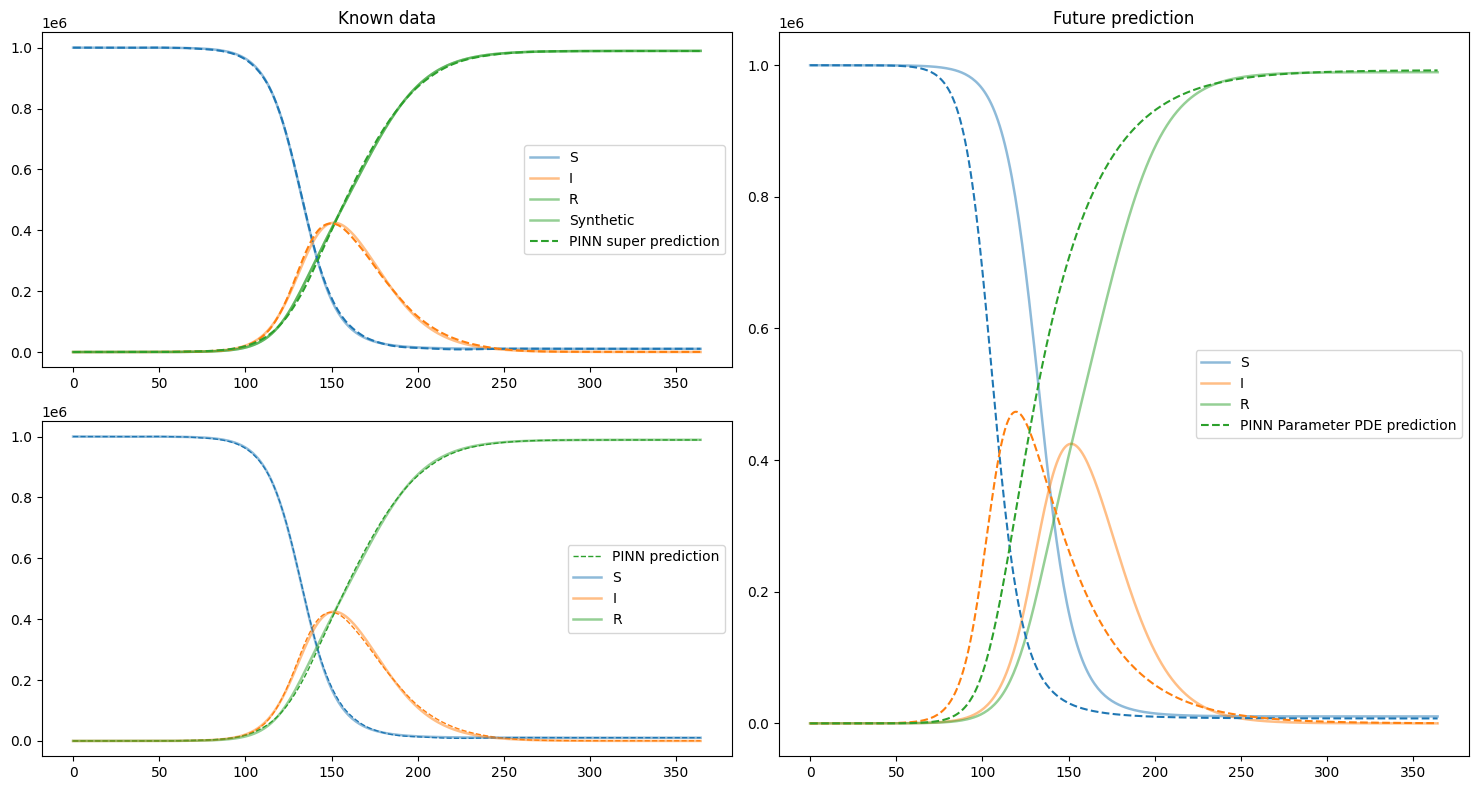

In [97]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1492000   [4.04e-07, 4.17e-06, 5.27e-06, 2.39e-09, 9.97e-10, 5.52e-10, 4.21e-07, 2.26e-06, 1.96e-06, 5.51e-08, 0.00e+00, 1.84e-13]    [4.04e-07, 4.17e-06, 5.27e-06, 2.39e-09, 9.97e-10, 5.52e-10, 4.21e-07, 2.26e-06, 1.96e-06, 5.51e-08, 0.00e+00, 1.84e-13]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 26.051314 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1494000   [9.39e-06, 6.95e-06, 7.91e-06, 

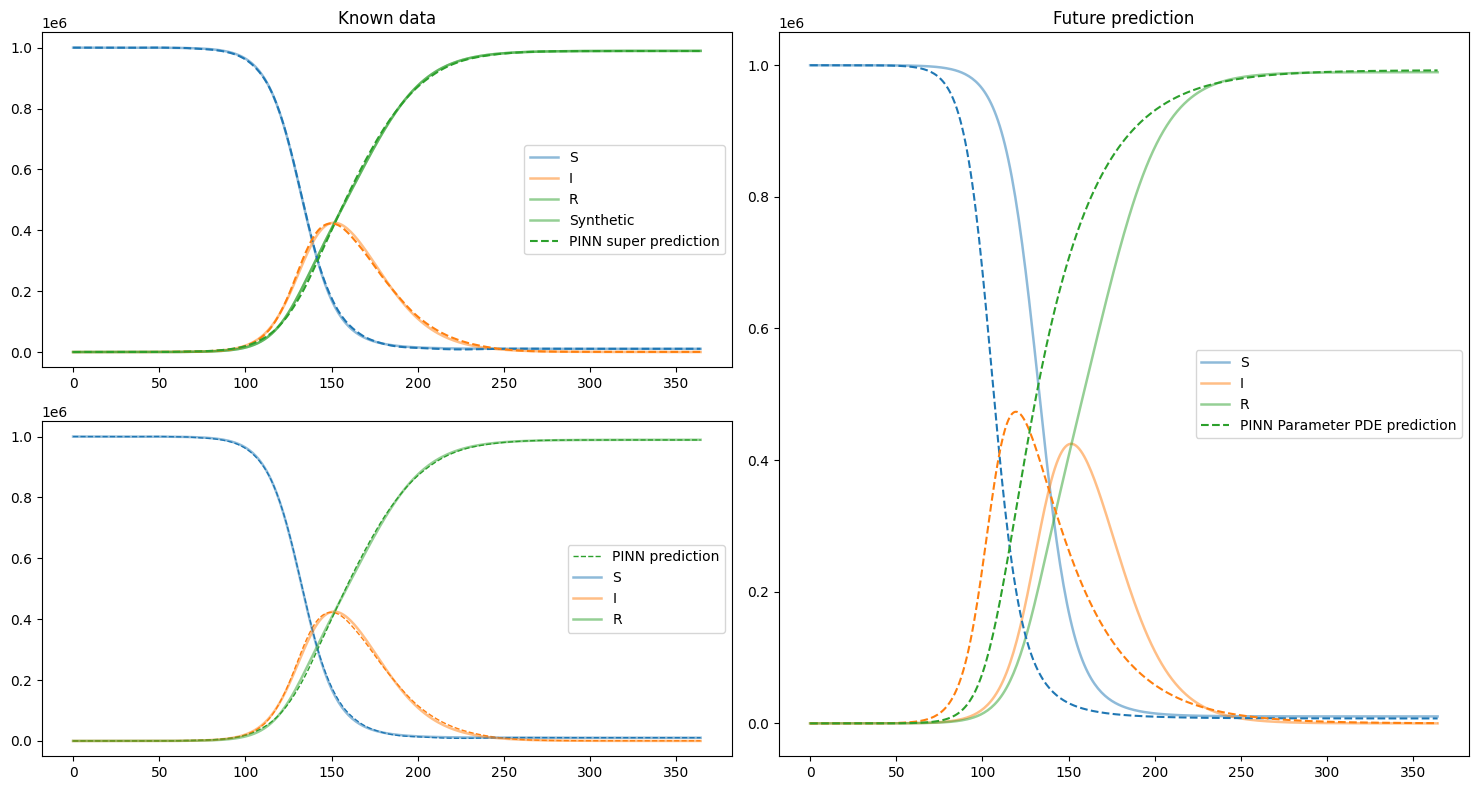

In [98]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1592000   [3.75e-07, 4.25e-06, 5.36e-06, 5.31e-08, 4.50e-08, 2.97e-09, 3.70e-07, 2.65e-06, 1.89e-06, 9.05e-07, 0.00e+00, 0.00e+00]    [3.75e-07, 4.25e-06, 5.36e-06, 5.31e-08, 4.50e-08, 2.97e-09, 3.70e-07, 2.65e-06, 1.89e-06, 9.05e-07, 0.00e+00, 0.00e+00]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 24.001329 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1594000   [4.71e-07, 4.16e-06, 5.28e-06, 

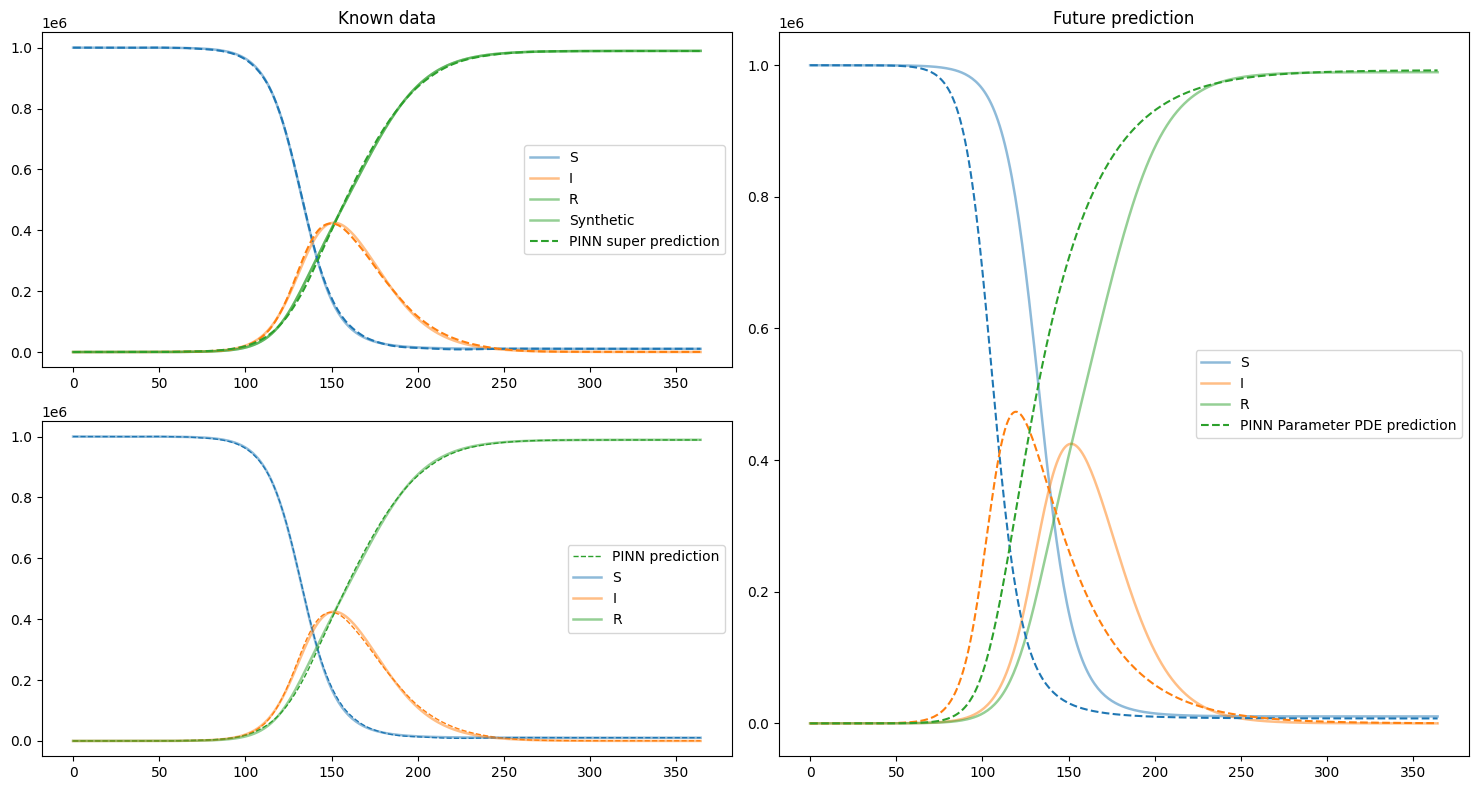

In [99]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1692000   [2.54e-05, 1.76e-05, 8.76e-06, 1.48e-05, 3.31e-05, 2.29e-05, 1.69e-05, 1.09e-05, 3.41e-05, 1.29e-04, 4.90e-06, 4.72e-06]    [2.54e-05, 1.76e-05, 8.76e-06, 1.48e-05, 3.31e-05, 2.29e-05, 1.69e-05, 1.09e-05, 3.41e-05, 1.29e-04, 4.90e-06, 4.72e-06]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 26.781223 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1694000   [4.37e-07, 4.12e-06, 5.28e-06, 

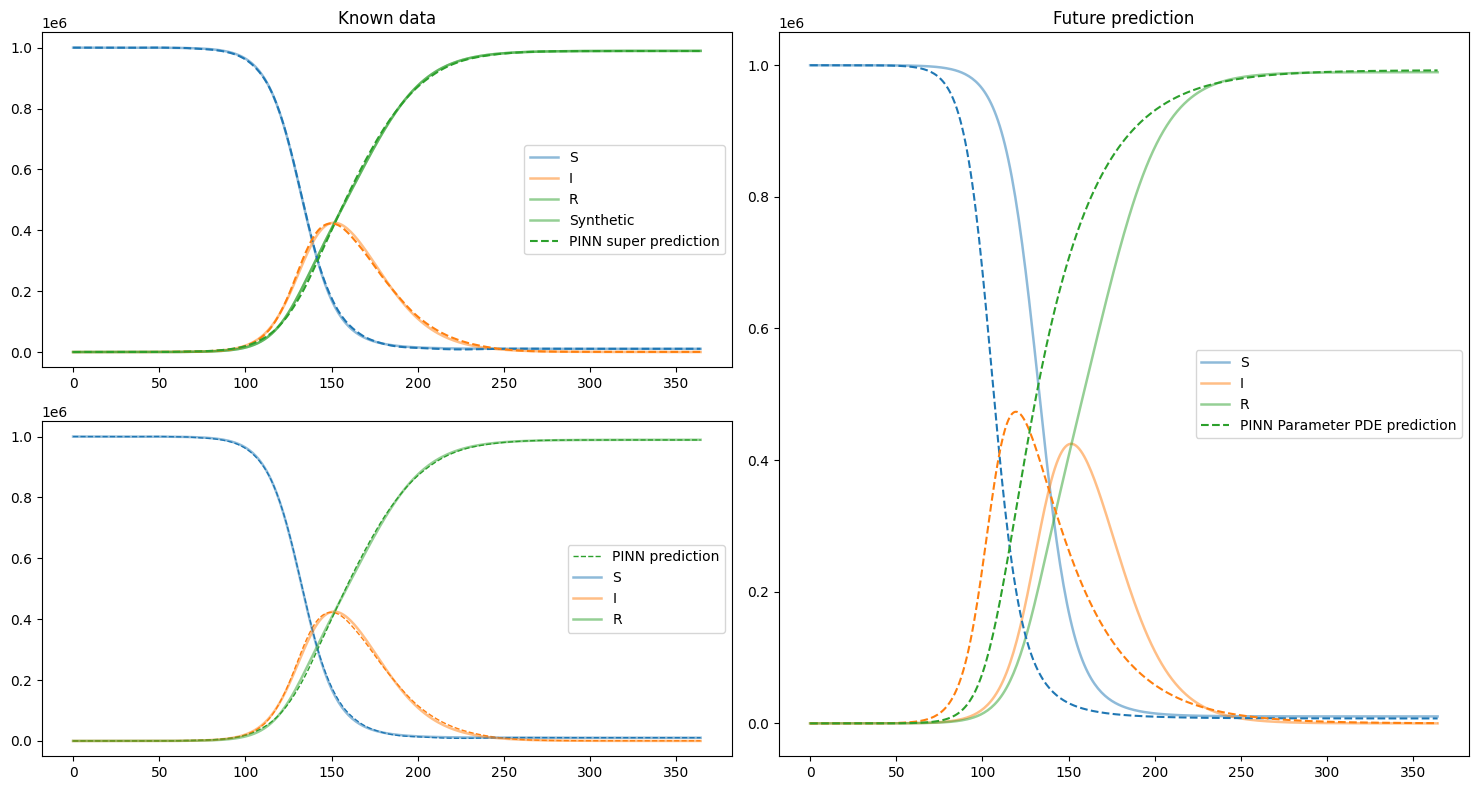

In [100]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1792000   [4.64e-07, 4.12e-06, 5.25e-06, 2.61e-09, 1.90e-09, 1.88e-09, 4.20e-07, 2.32e-06, 1.97e-06, 8.29e-08, 0.00e+00, 0.00e+00]    [4.64e-07, 4.12e-06, 5.25e-06, 2.61e-09, 1.90e-09, 1.88e-09, 4.20e-07, 2.32e-06, 1.97e-06, 8.29e-08, 0.00e+00, 0.00e+00]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 29.341391 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1794000   [5.69e-07, 4.59e-06, 5.25e-06, 

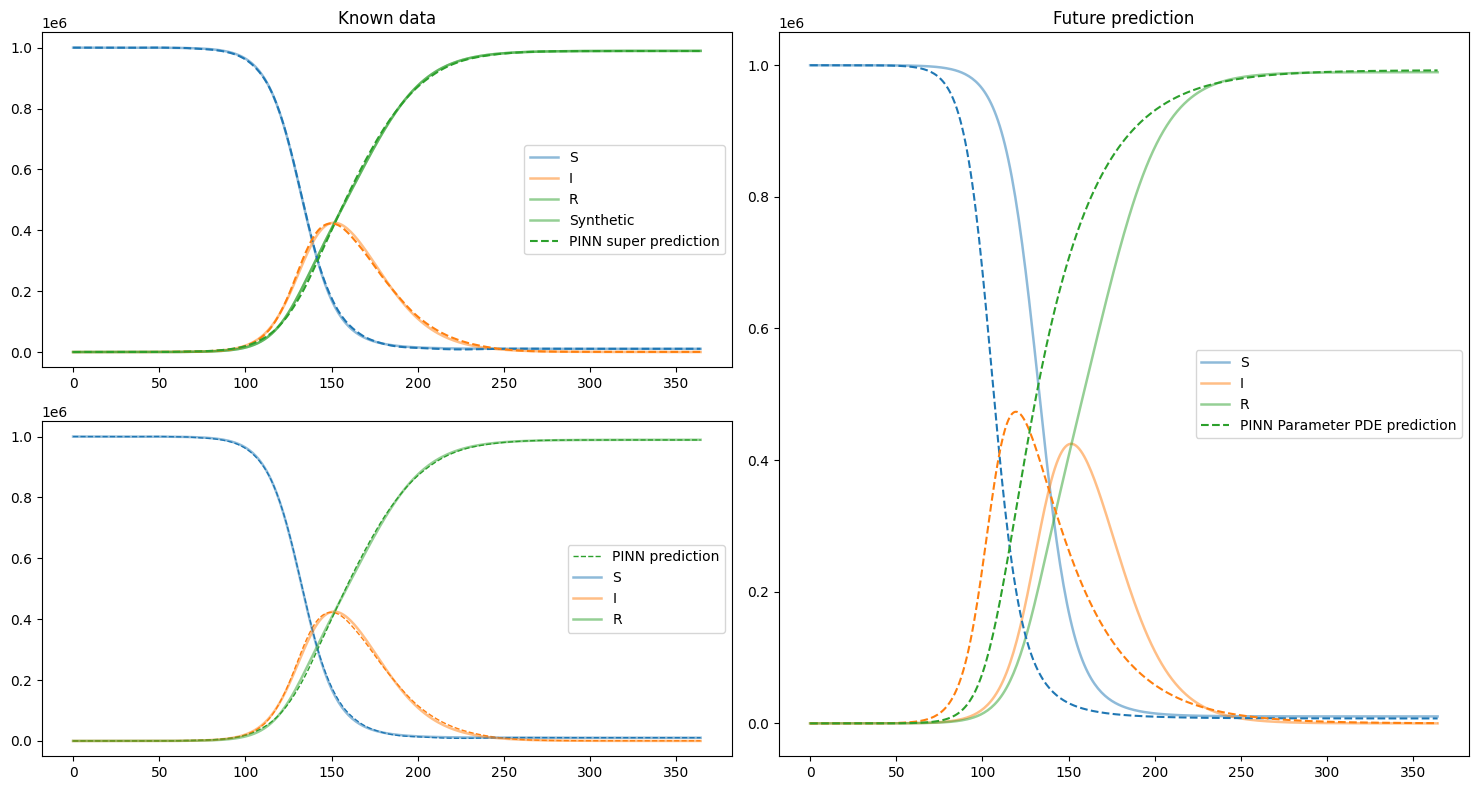

In [101]:
intermediate_train()

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1892000   [4.98e-07, 4.07e-06, 5.25e-06, 3.86e-10, 5.28e-11, 1.74e-11, 4.20e-07, 2.29e-06, 1.98e-06, 3.06e-08, 1.75e-12, 1.45e-13]    [4.98e-07, 4.07e-06, 5.25e-06, 3.86e-10, 5.28e-11, 1.74e-11, 4.20e-07, 2.29e-06, 1.98e-06, 3.06e-08, 1.75e-12, 1.45e-13]    []  

Best model at step 288759:
  train loss: 1.43e-05
  test loss: 1.43e-05
  test metric: []

'train' took 29.944067 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric
1894000   [4.52e-07, 4.13e-06, 5.23e-06, 

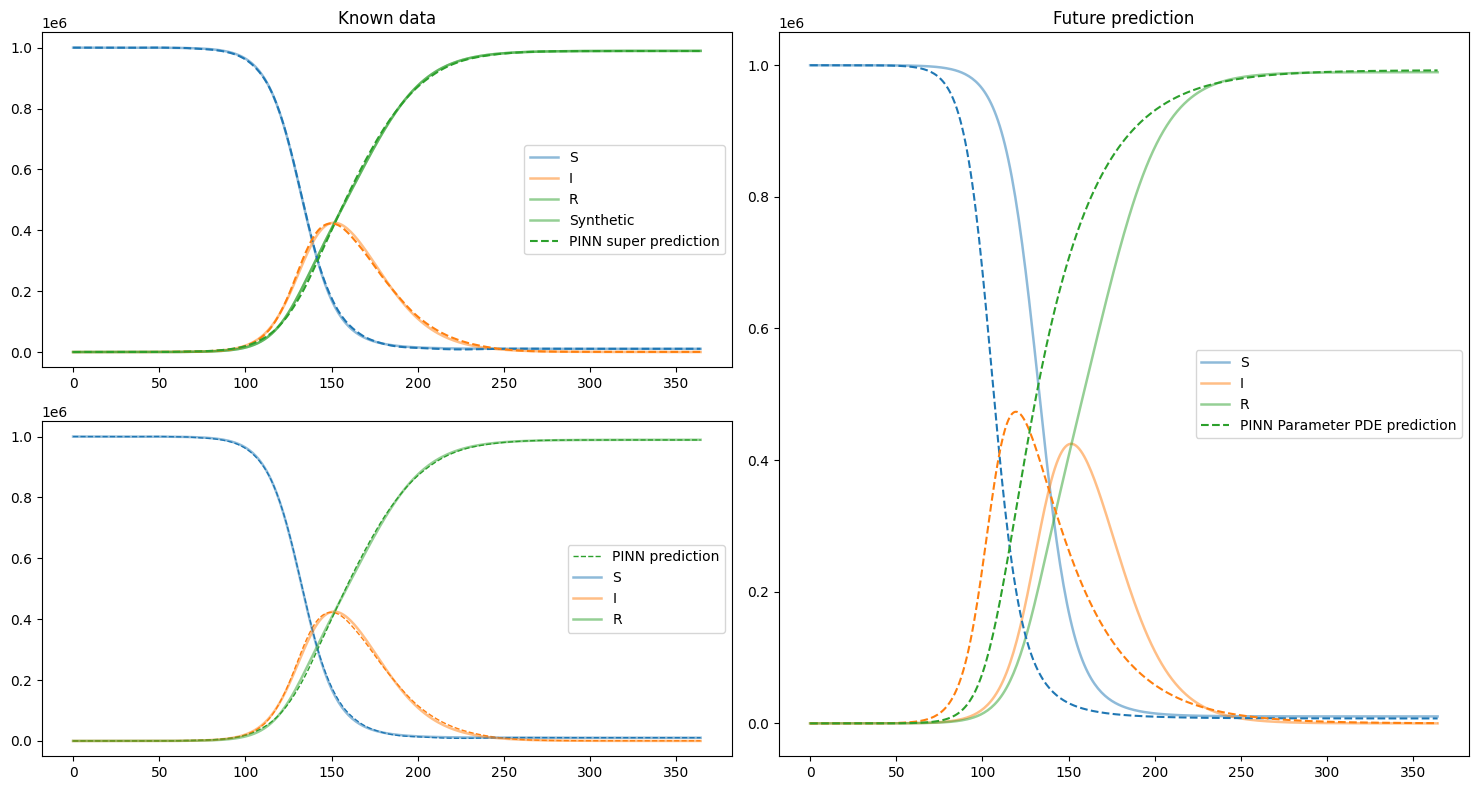

In [102]:
intermediate_train()

# Final Output 

In [104]:
# params_nn, best_step = model.get_best_params(out_func=np.exp) # parameters need to be extracted with the exponential functino as they have been modelled in logspace
params_nn, best_step = model.get_best_params() # parameters need to be extracted with the exponential functino as they have been modelled in logspace
print(static_parameters, sep="\n")
t_nn_param, wsol_nn_param, wsol_sird_nn_param = solver(*params_nn)

model.set_synthetic_data(t_synth, solution_synth_full) 
model.set_nn_synthetic_data(t_nn_param, wsol_nn_param, wsol_sird_nn_param)
plot = Plot(model, values_to_plot=sird_model_PINN.initial_conditions_keys) # class that contains plotting functions
# plot.show_known_and_prediction()
# plot.plot_param_history()
# plot.plot_loss_history()

Best train step: 288759
alpha: 0.16134302318
beta: 0.032726481557
{'alpha': 0.17, 'beta': 0.07, 'kappa': 0.5}


TypeError: <DiseaseModel.GeneralModelSolver object at 0x2cfbe2f40> argument after * must be an iterable, not float

/Users/jhh/Library/Mobile Documents/com~apple~CloudDocs/DTU/11Semester Msc/Deep Learning/Deep_Learning_Project_PINN/exercises_Jakob/Plot.py:290: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/jhh/Library/Mobile Documents/com~apple~CloudDocs/DTU/11Semester Msc/Deep Learning/Deep_Learning_Project_PINN/.venv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


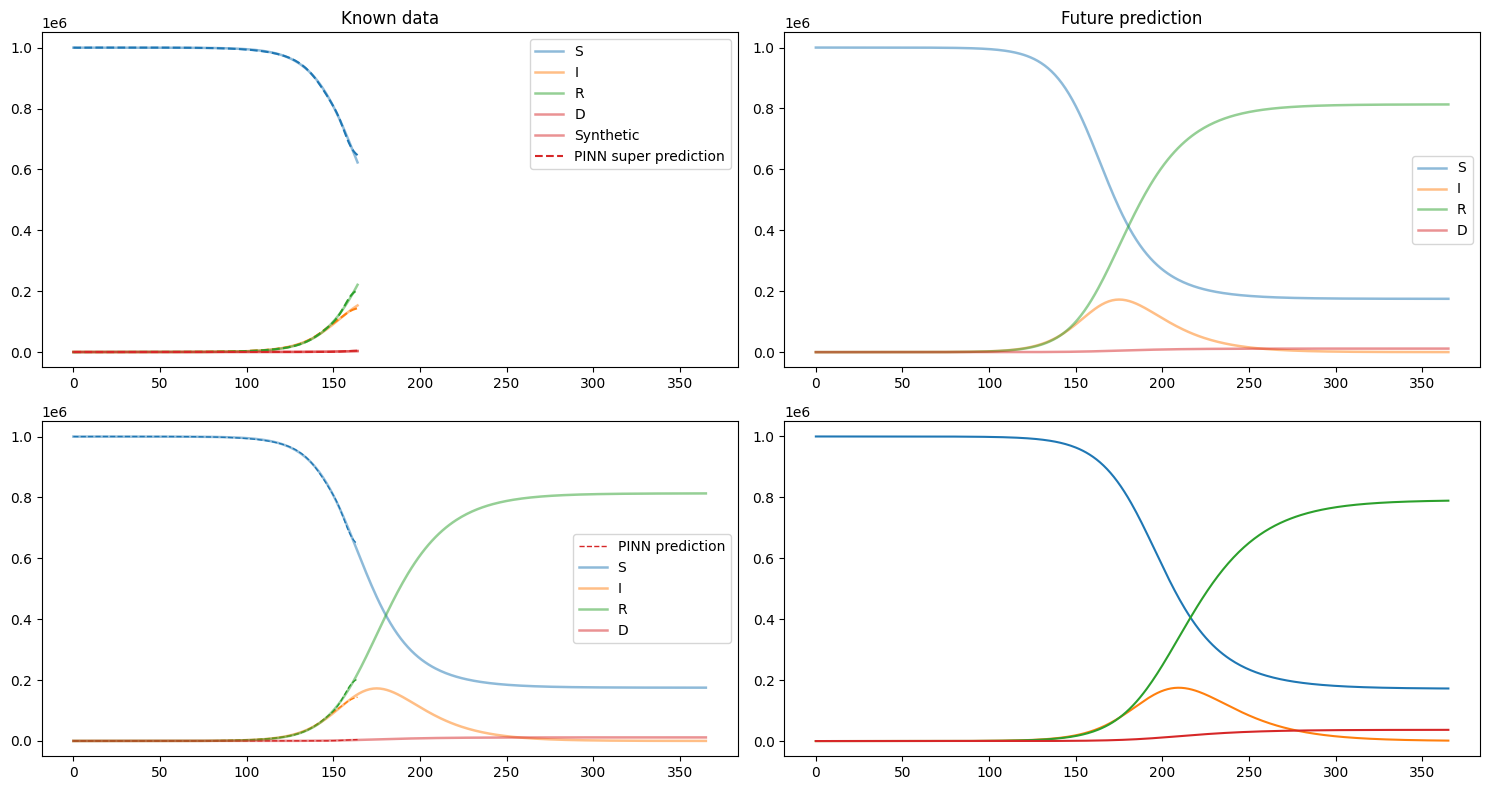

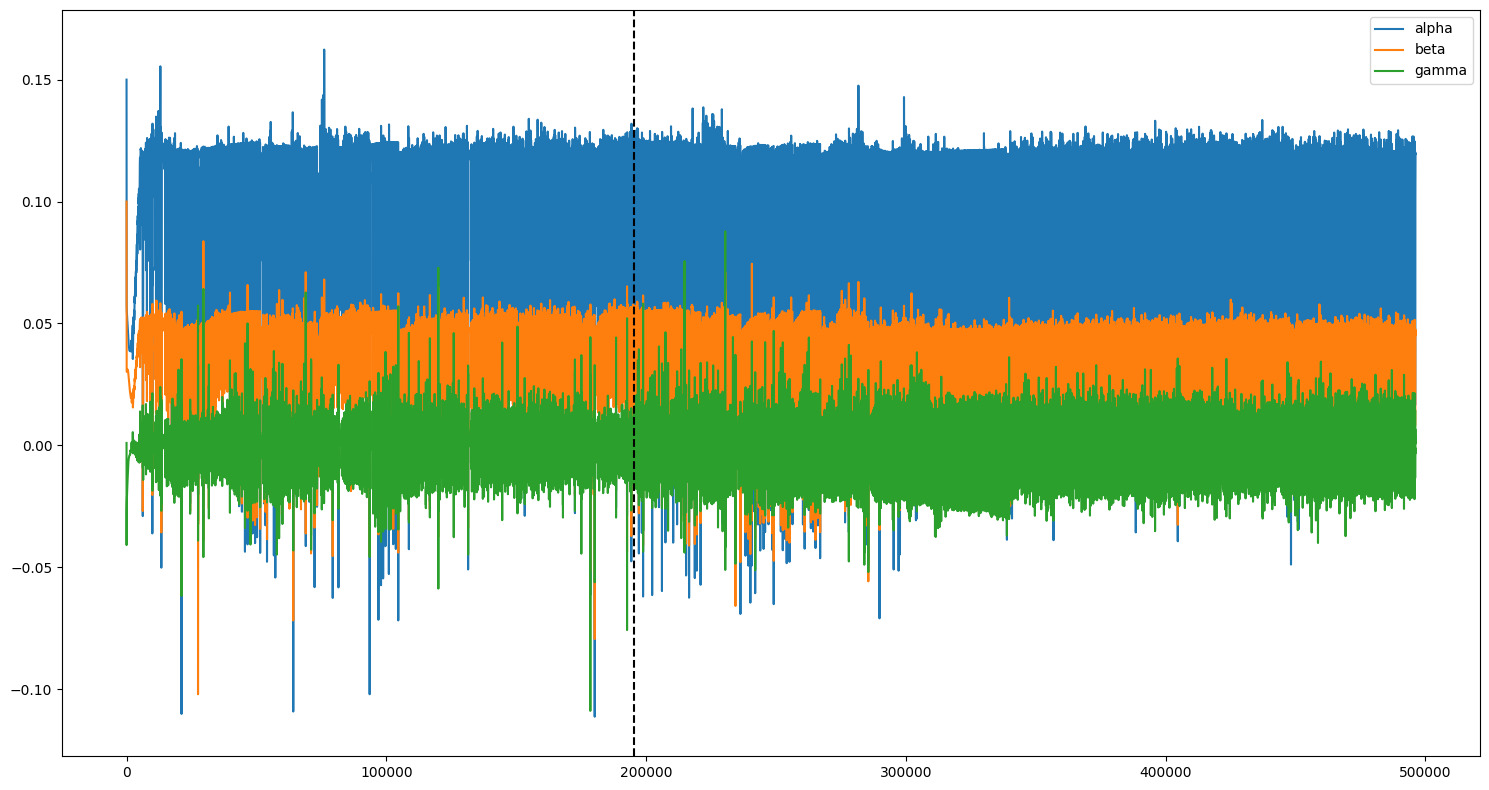

/Users/jhh/Library/Mobile Documents/com~apple~CloudDocs/DTU/11Semester Msc/Deep Learning/Deep_Learning_Project_PINN/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


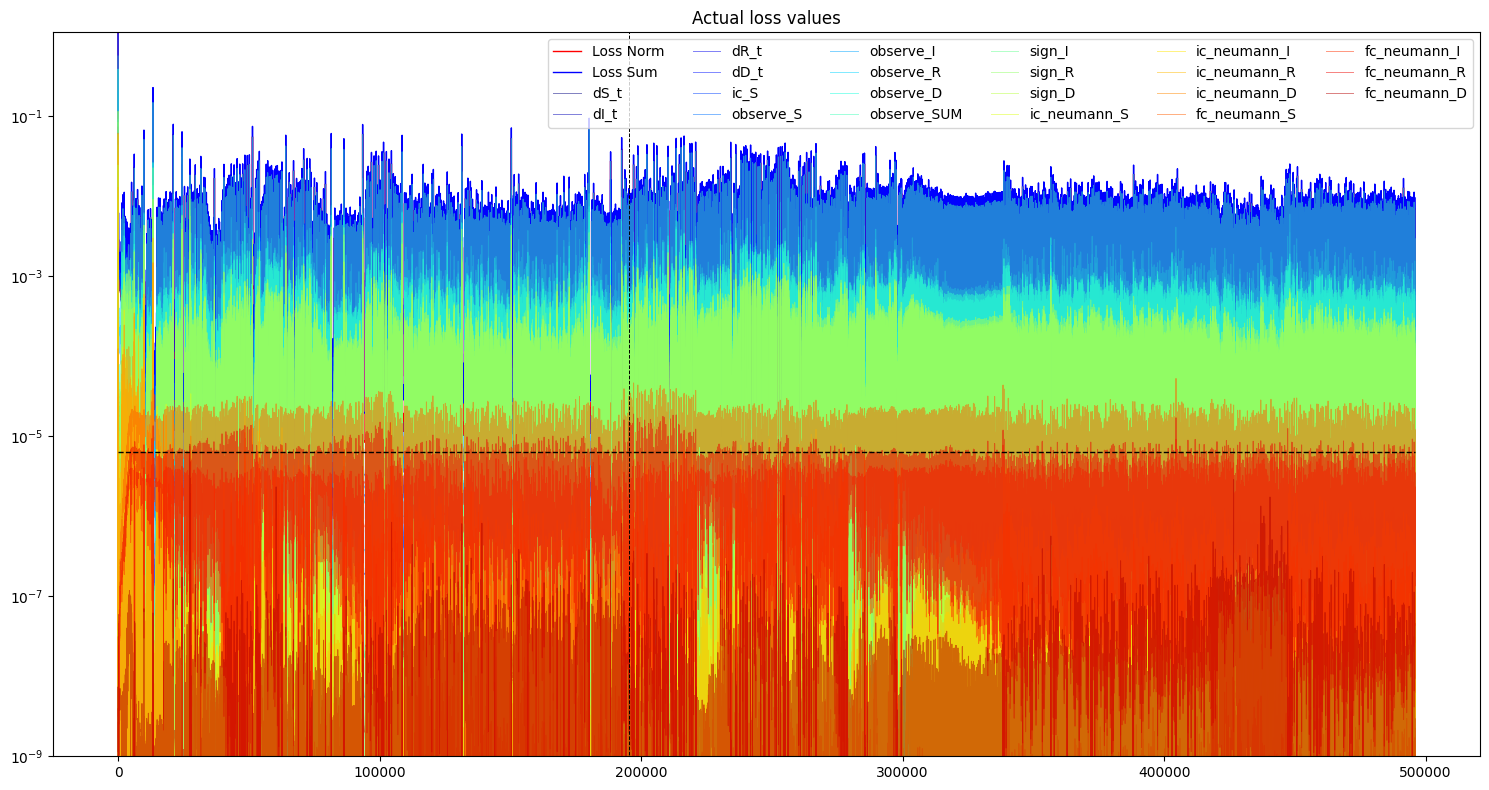

In [ ]:
plot.show_known_and_prediction()
plot.plot_param_history()
plot.plot_loss_history()

In [ ]:
# from SIRD_normal_nn import SIRD_net
# max_timestep = 100000
# t_bool = t_synth < max_timestep
# t = t_synth[t_bool]
# wsol = solution_synth[t_bool]

# net = SIRD_net(t, wsol, init_num_people=1e6)
# net.train()
# net.plot(t_synth, solution_synth)

In [ ]:
# fig, ax = plt.subplots()
# net.plot(ax, t_synth)